# Visualise monthly average prices of all RM_codes

In [1]:
!pip install fredapi

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import preprocessor as pre
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns;sns.set_style("whitegrid")
import numpy as np

def draw_graph(df:pd.DataFrame, x_col:str, y_col_actual:str):
    with_dummy = [code for code in df.columns if code.startswith("RM")]
    for code in with_dummy:
        fig = plt.subplots(figsize=[15, 6])

        # Plot actual prices
        sns.lineplot(x=x_col, y=y_col_actual, data=df[df[code]==True], label='Actual_price', linestyle='-')

        # Filter data for specific months
        filter_df = df[df[x_col].str.endswith(('3', '6', '9', '12'))]

        # Set x-axis ticks and labels
        plt.xticks(ticks=filter_df[x_col], labels=filter_df[x_col], rotation=45)
        target = next(iter(df["Group Description"].unique()))
        plt.title(f"{target}, {code}")
        plt.xlabel("Time")
        plt.ylabel("Average price")
        
        # Display the plot
        plt.show()
        

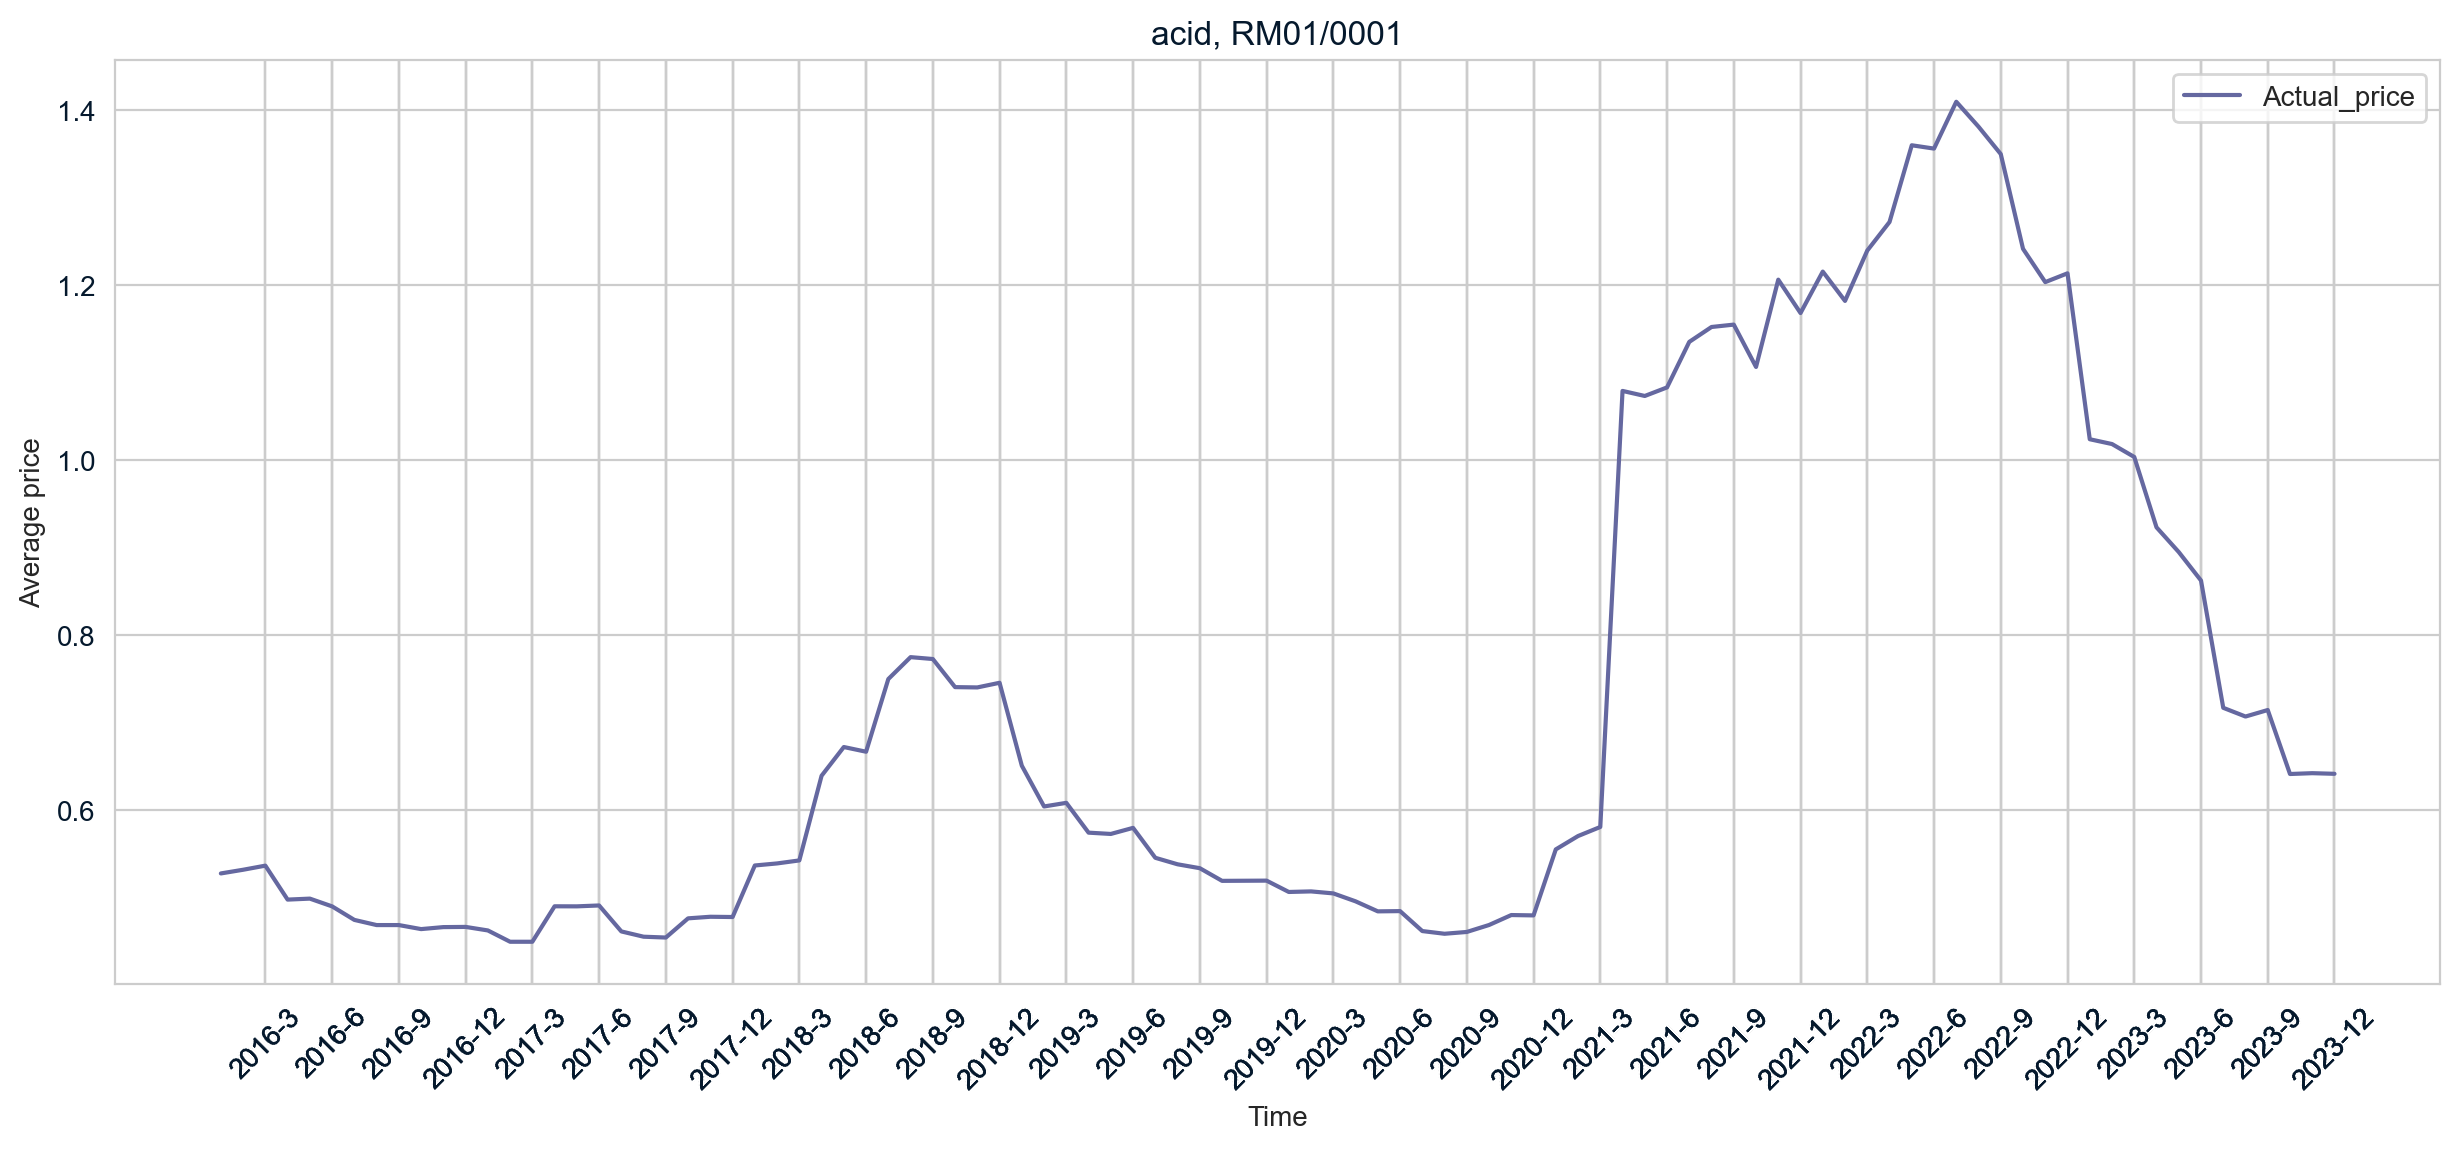

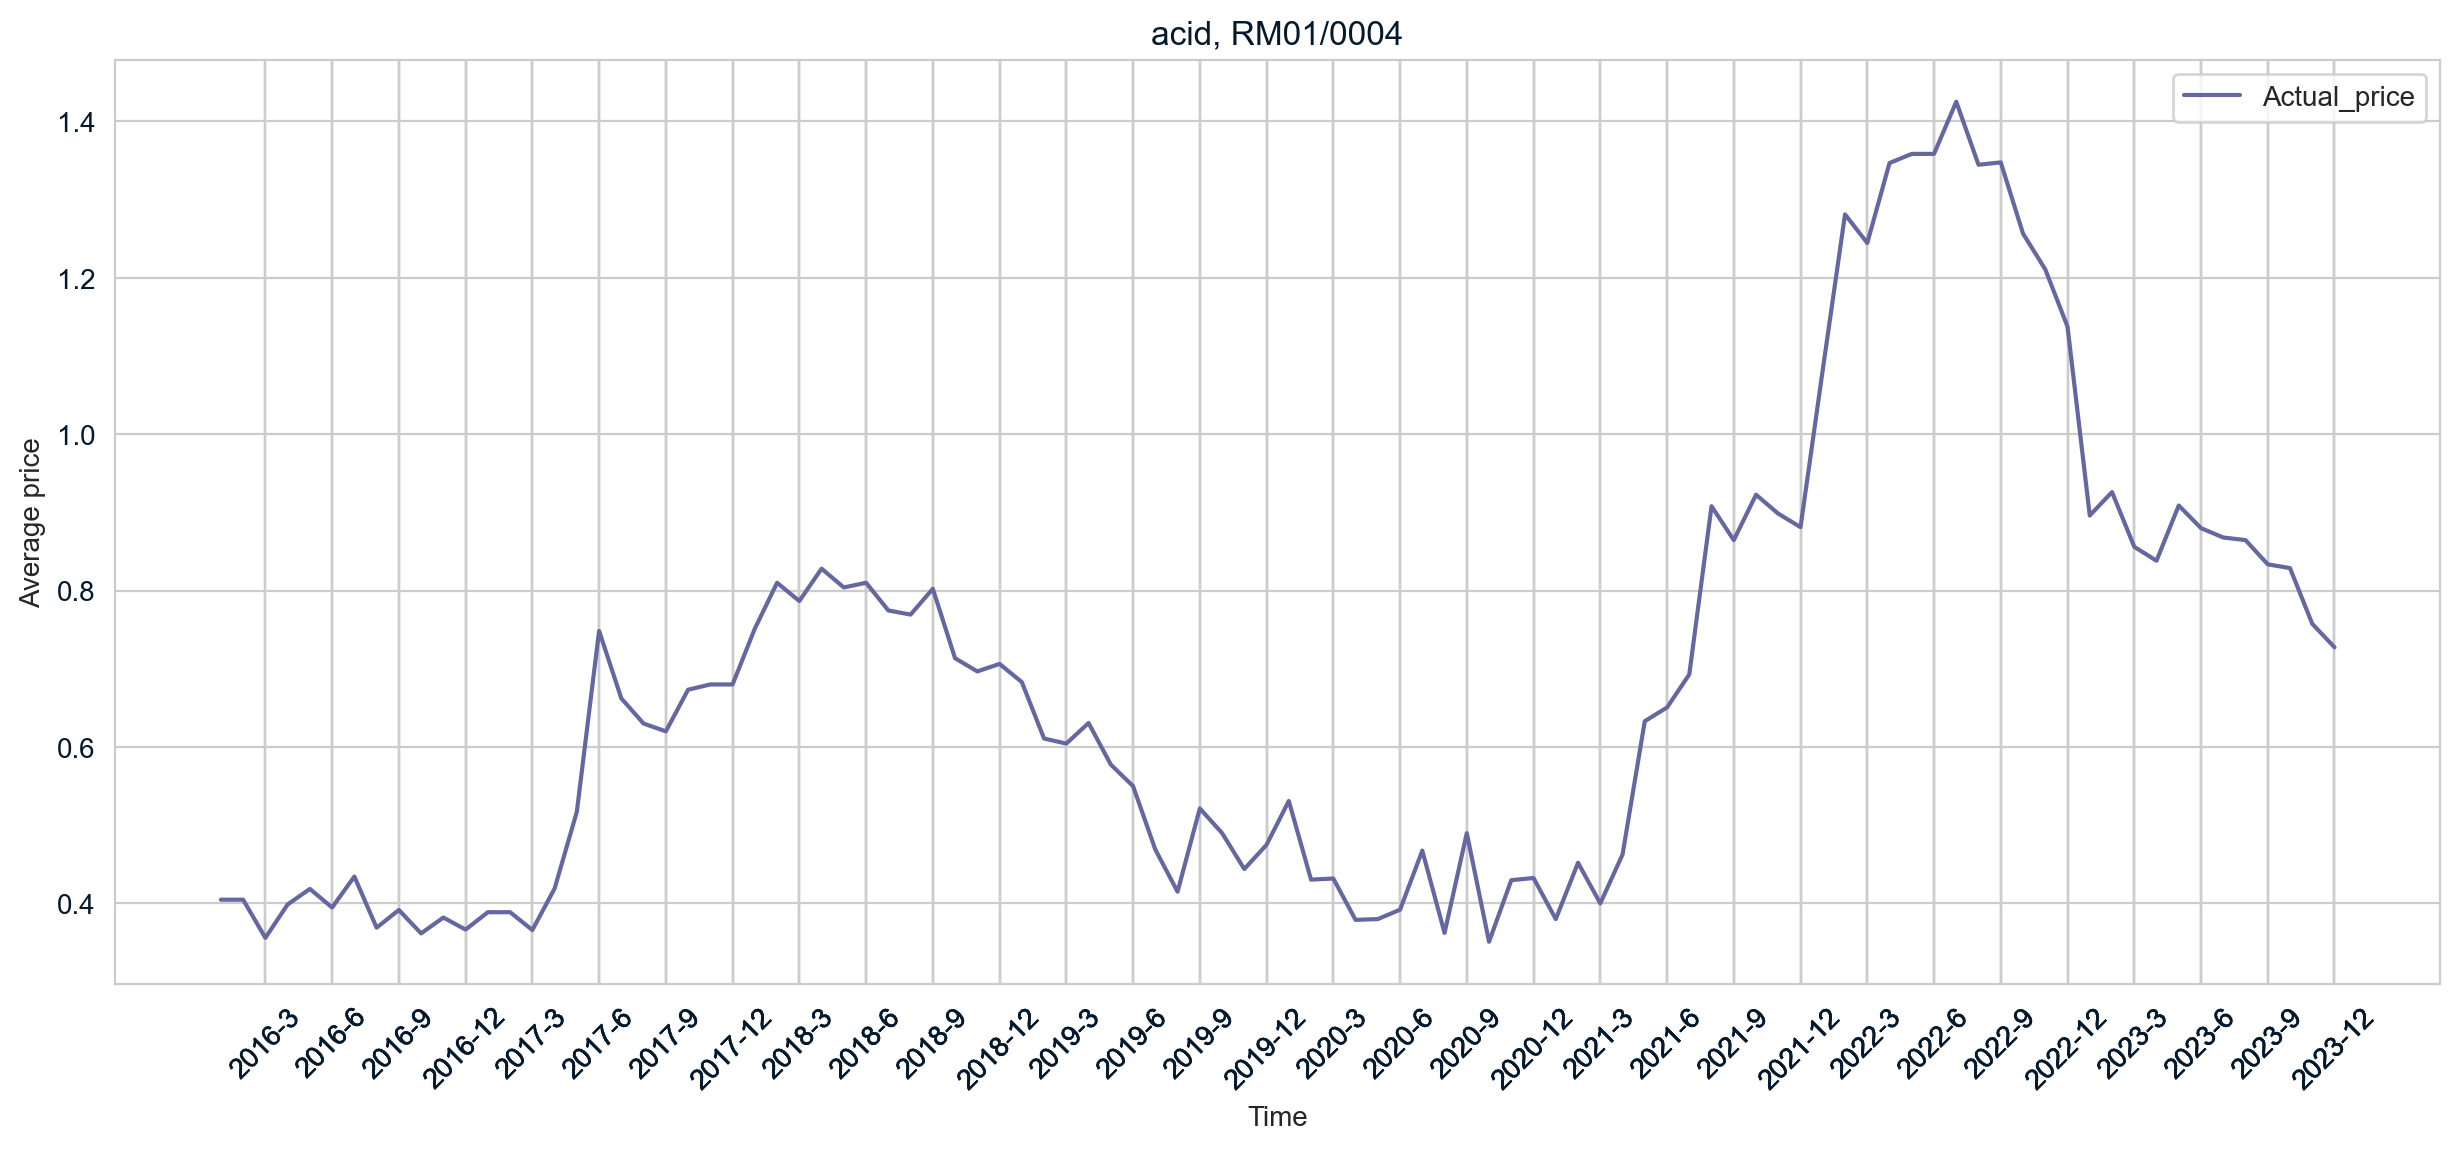

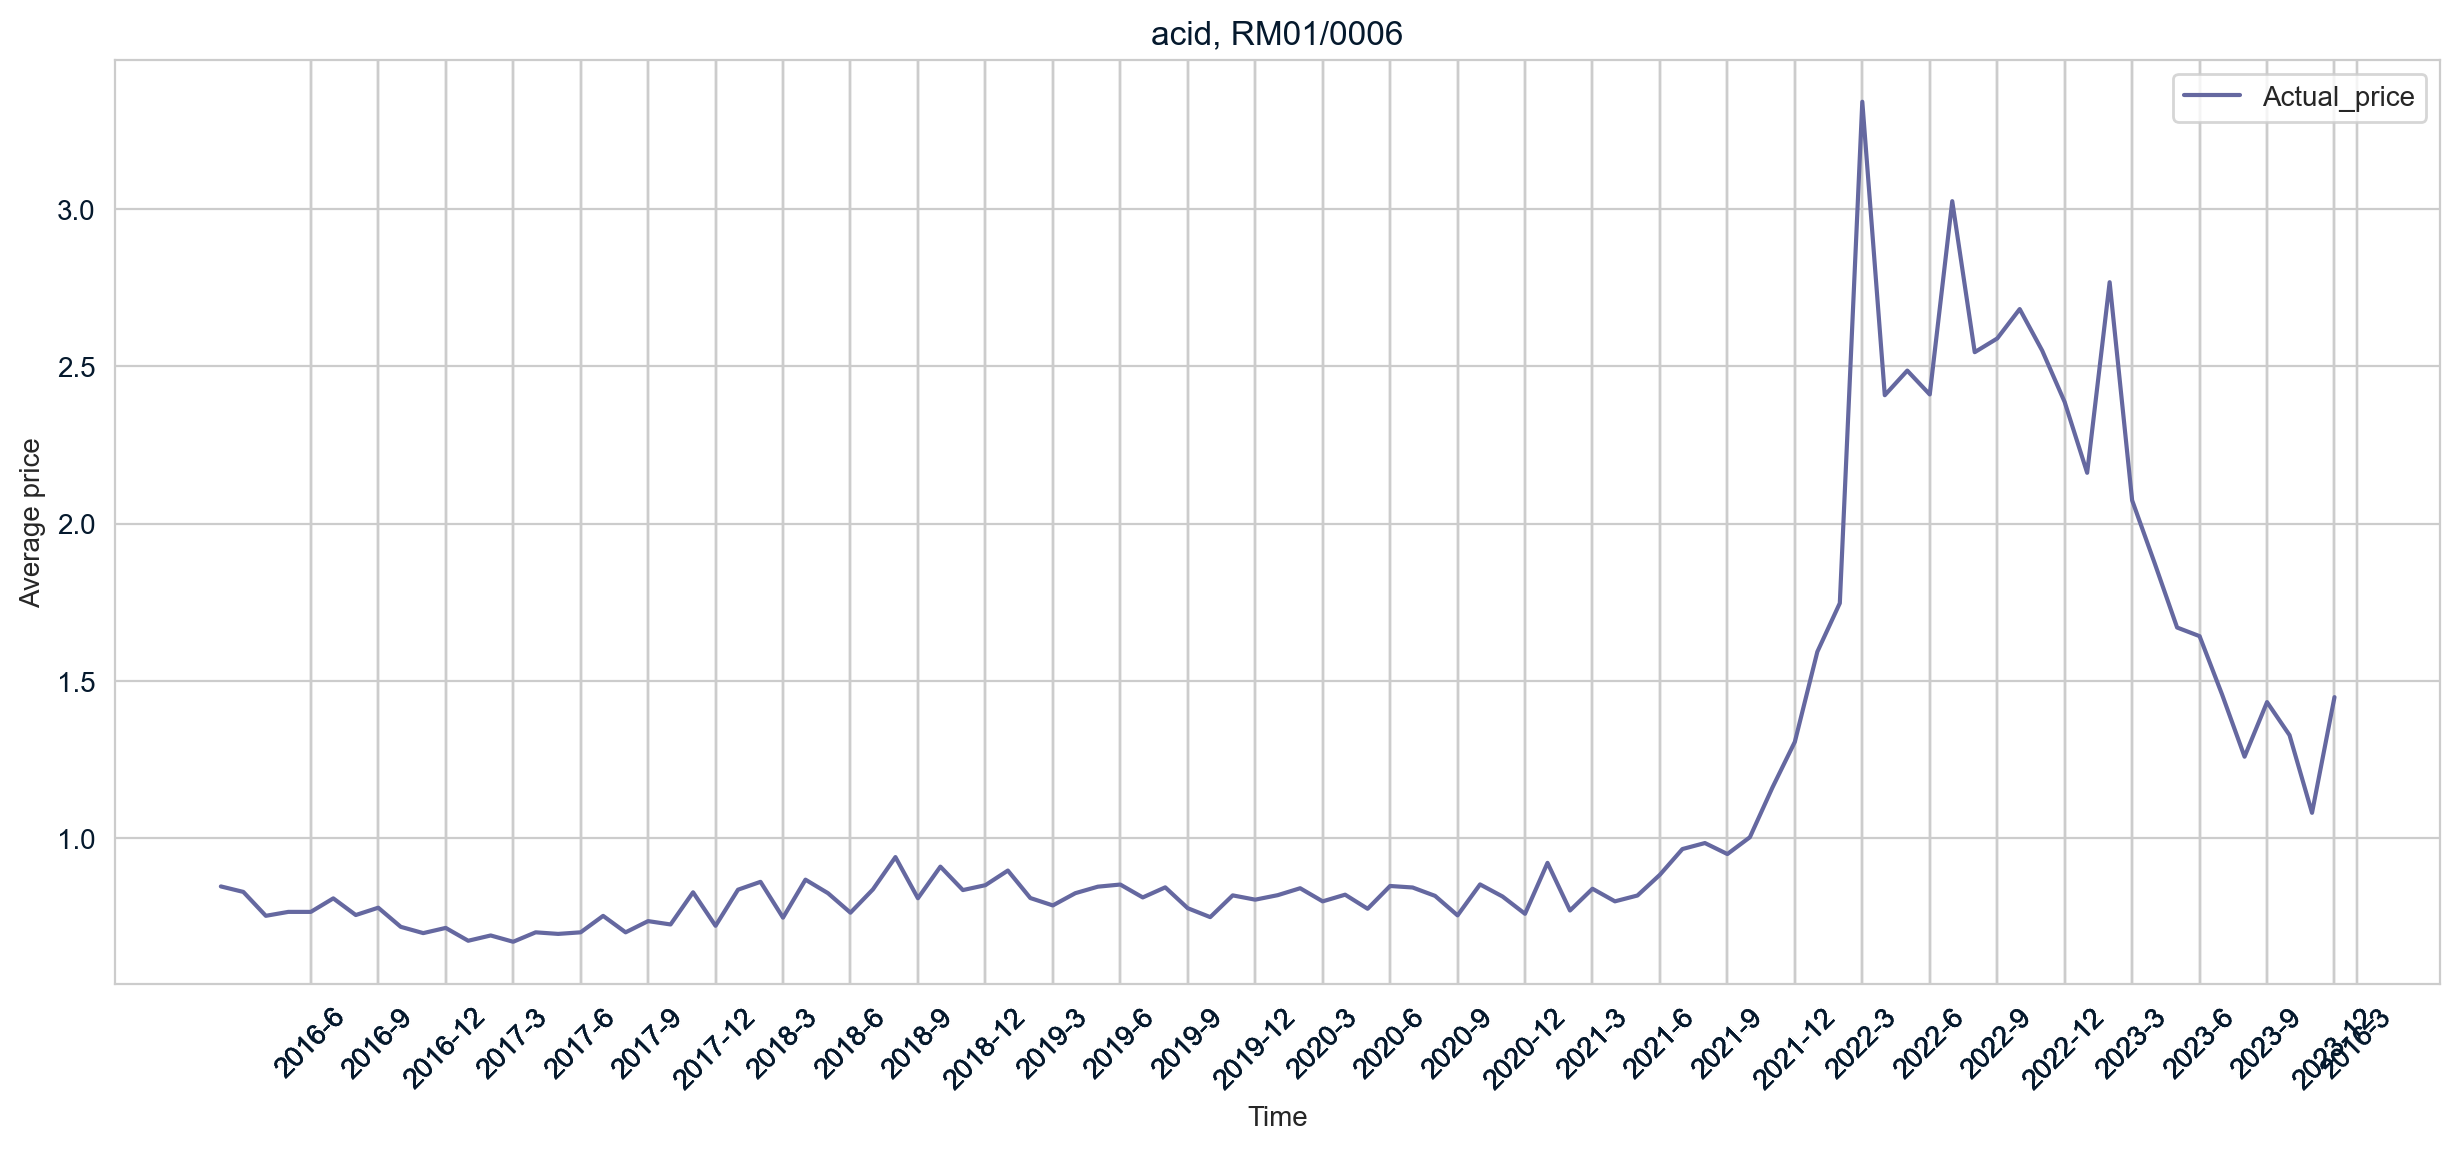

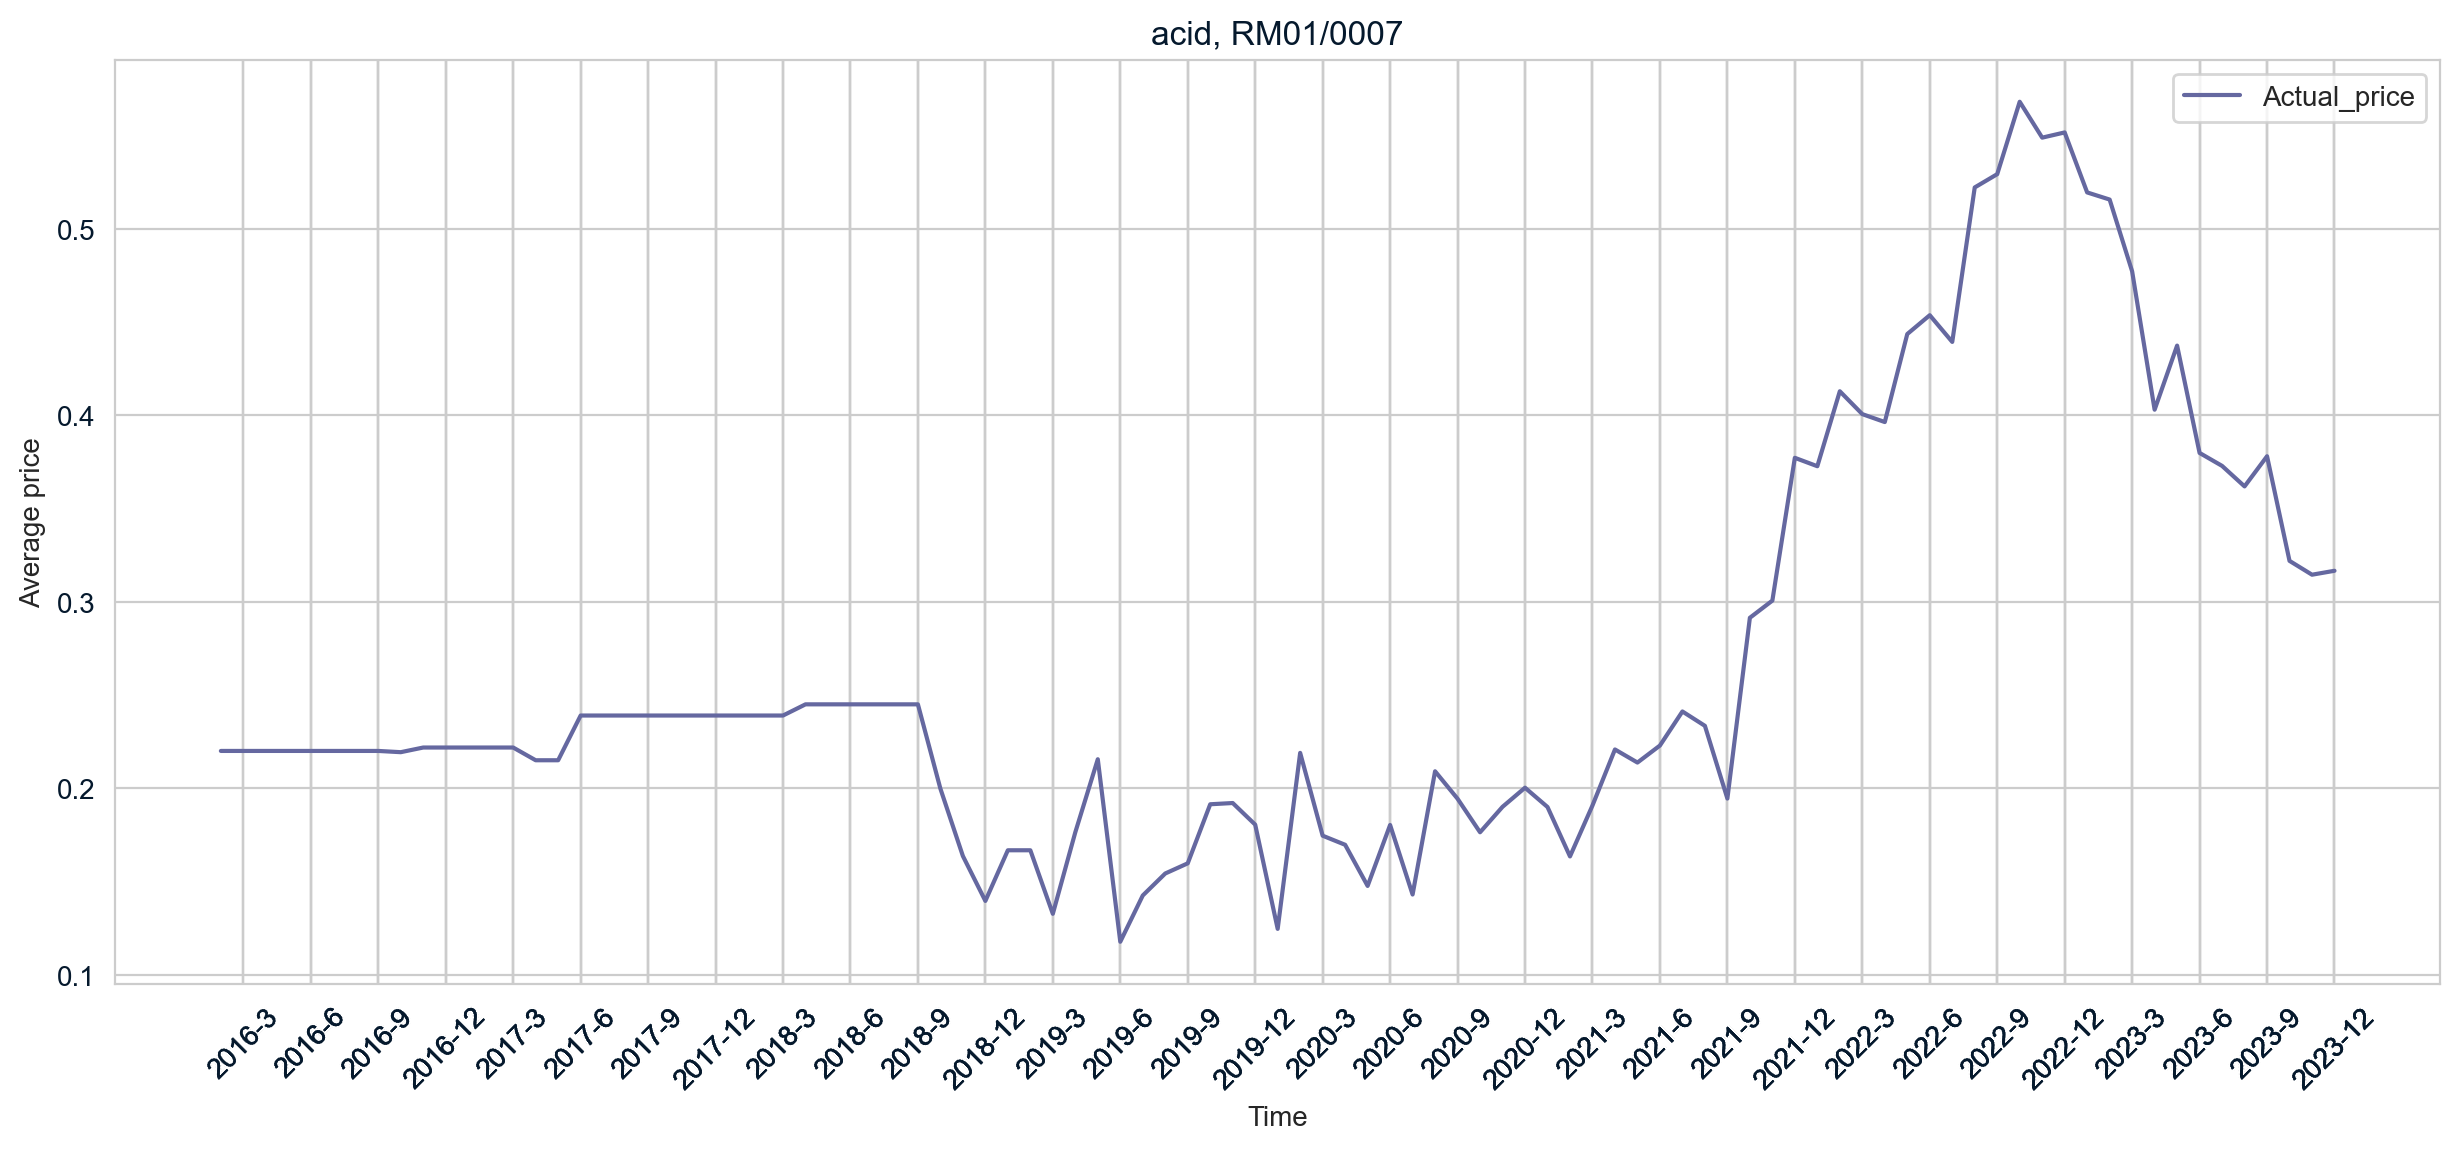

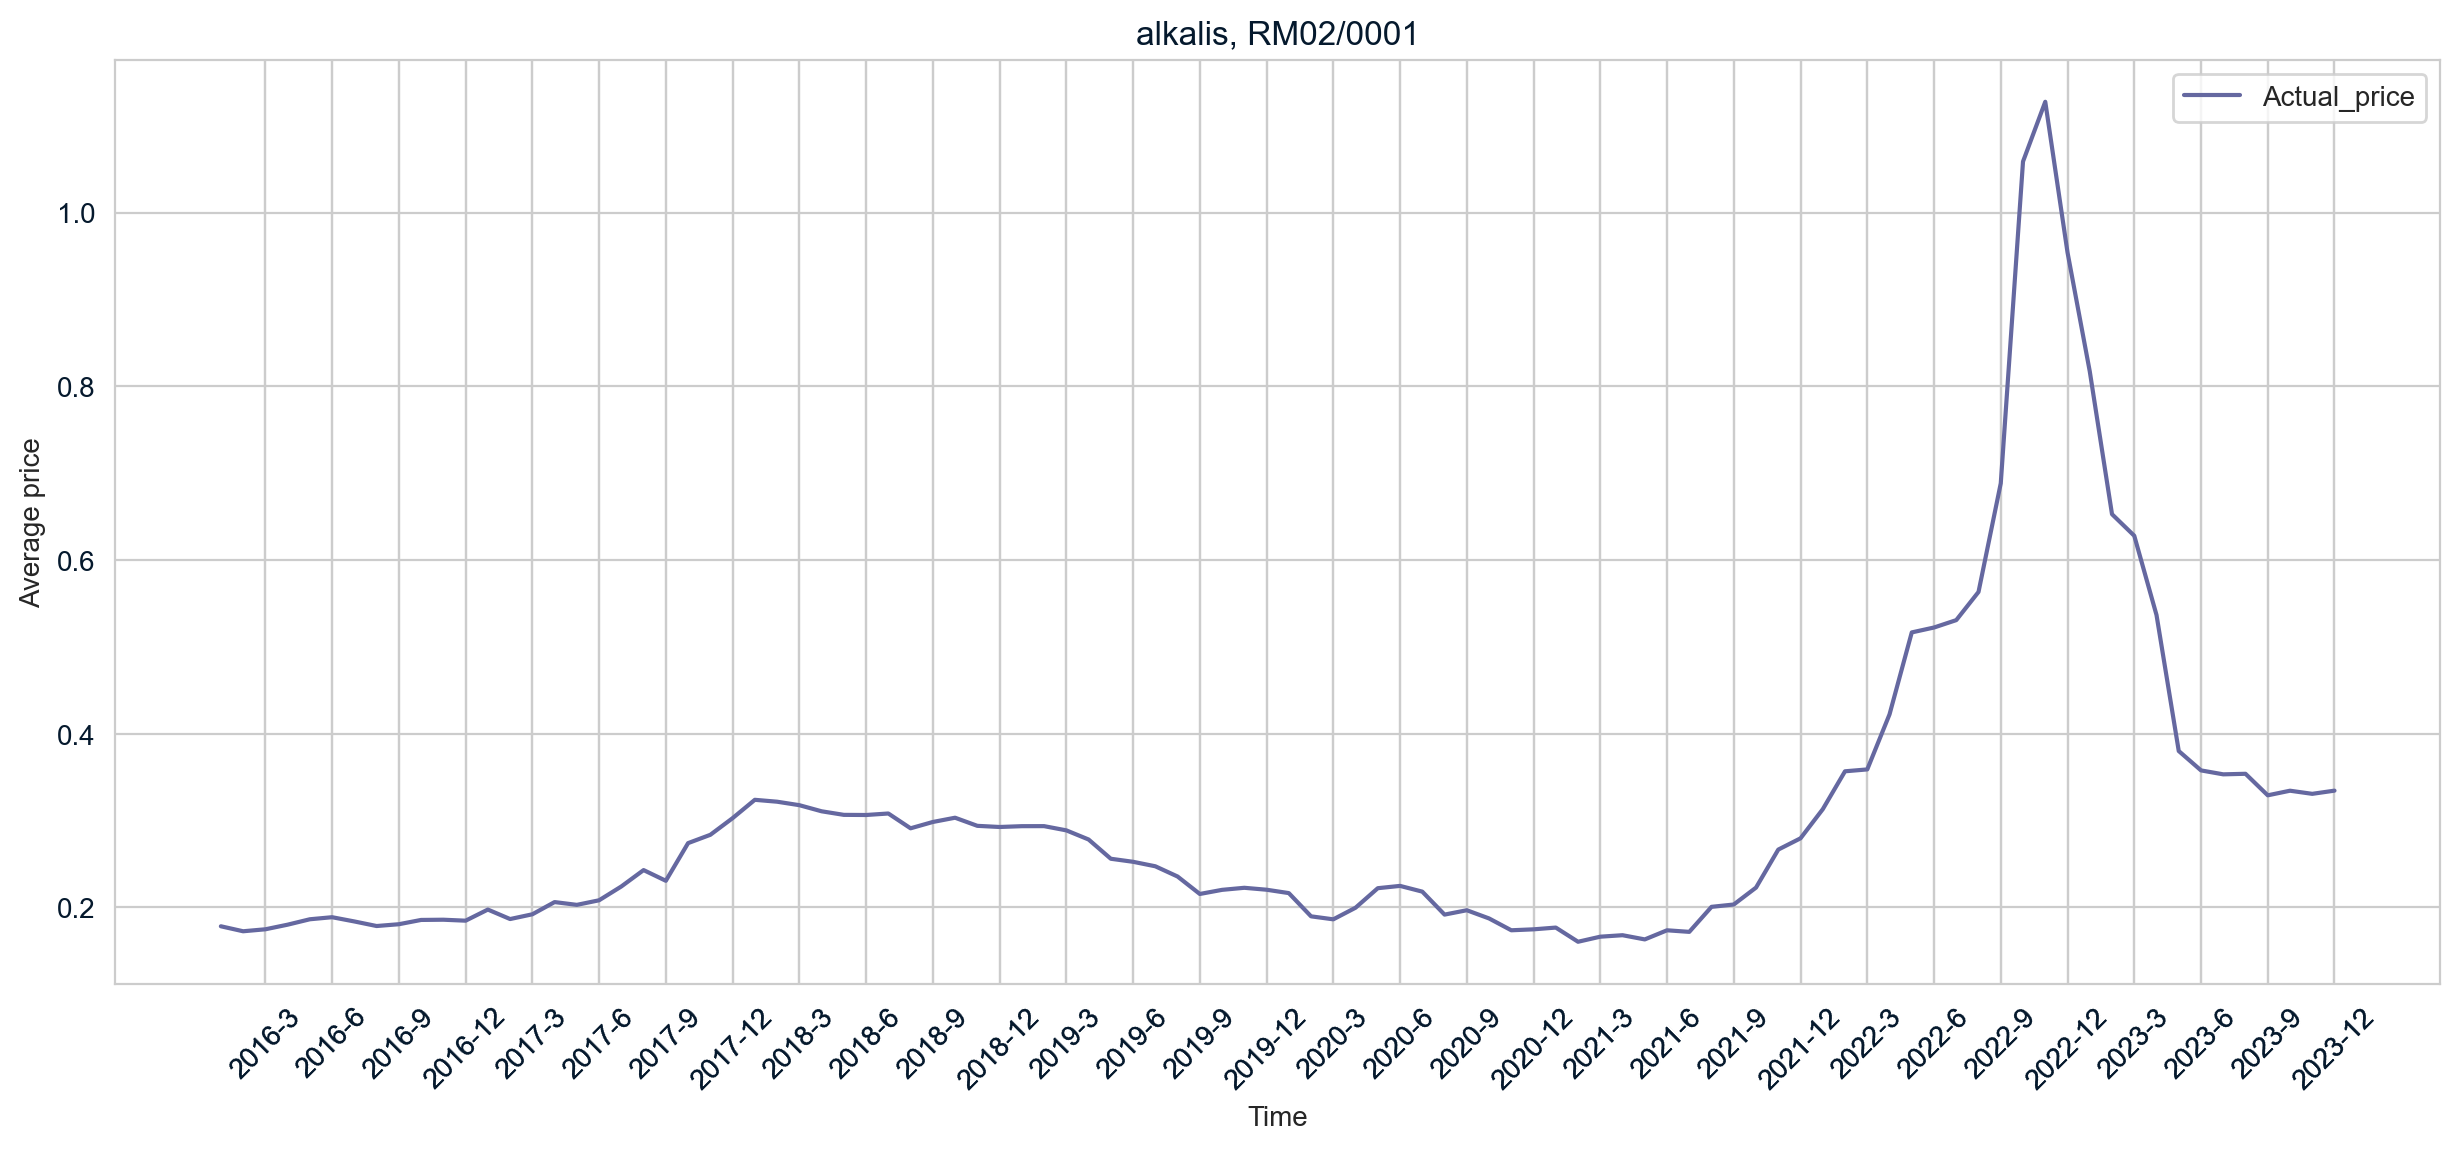

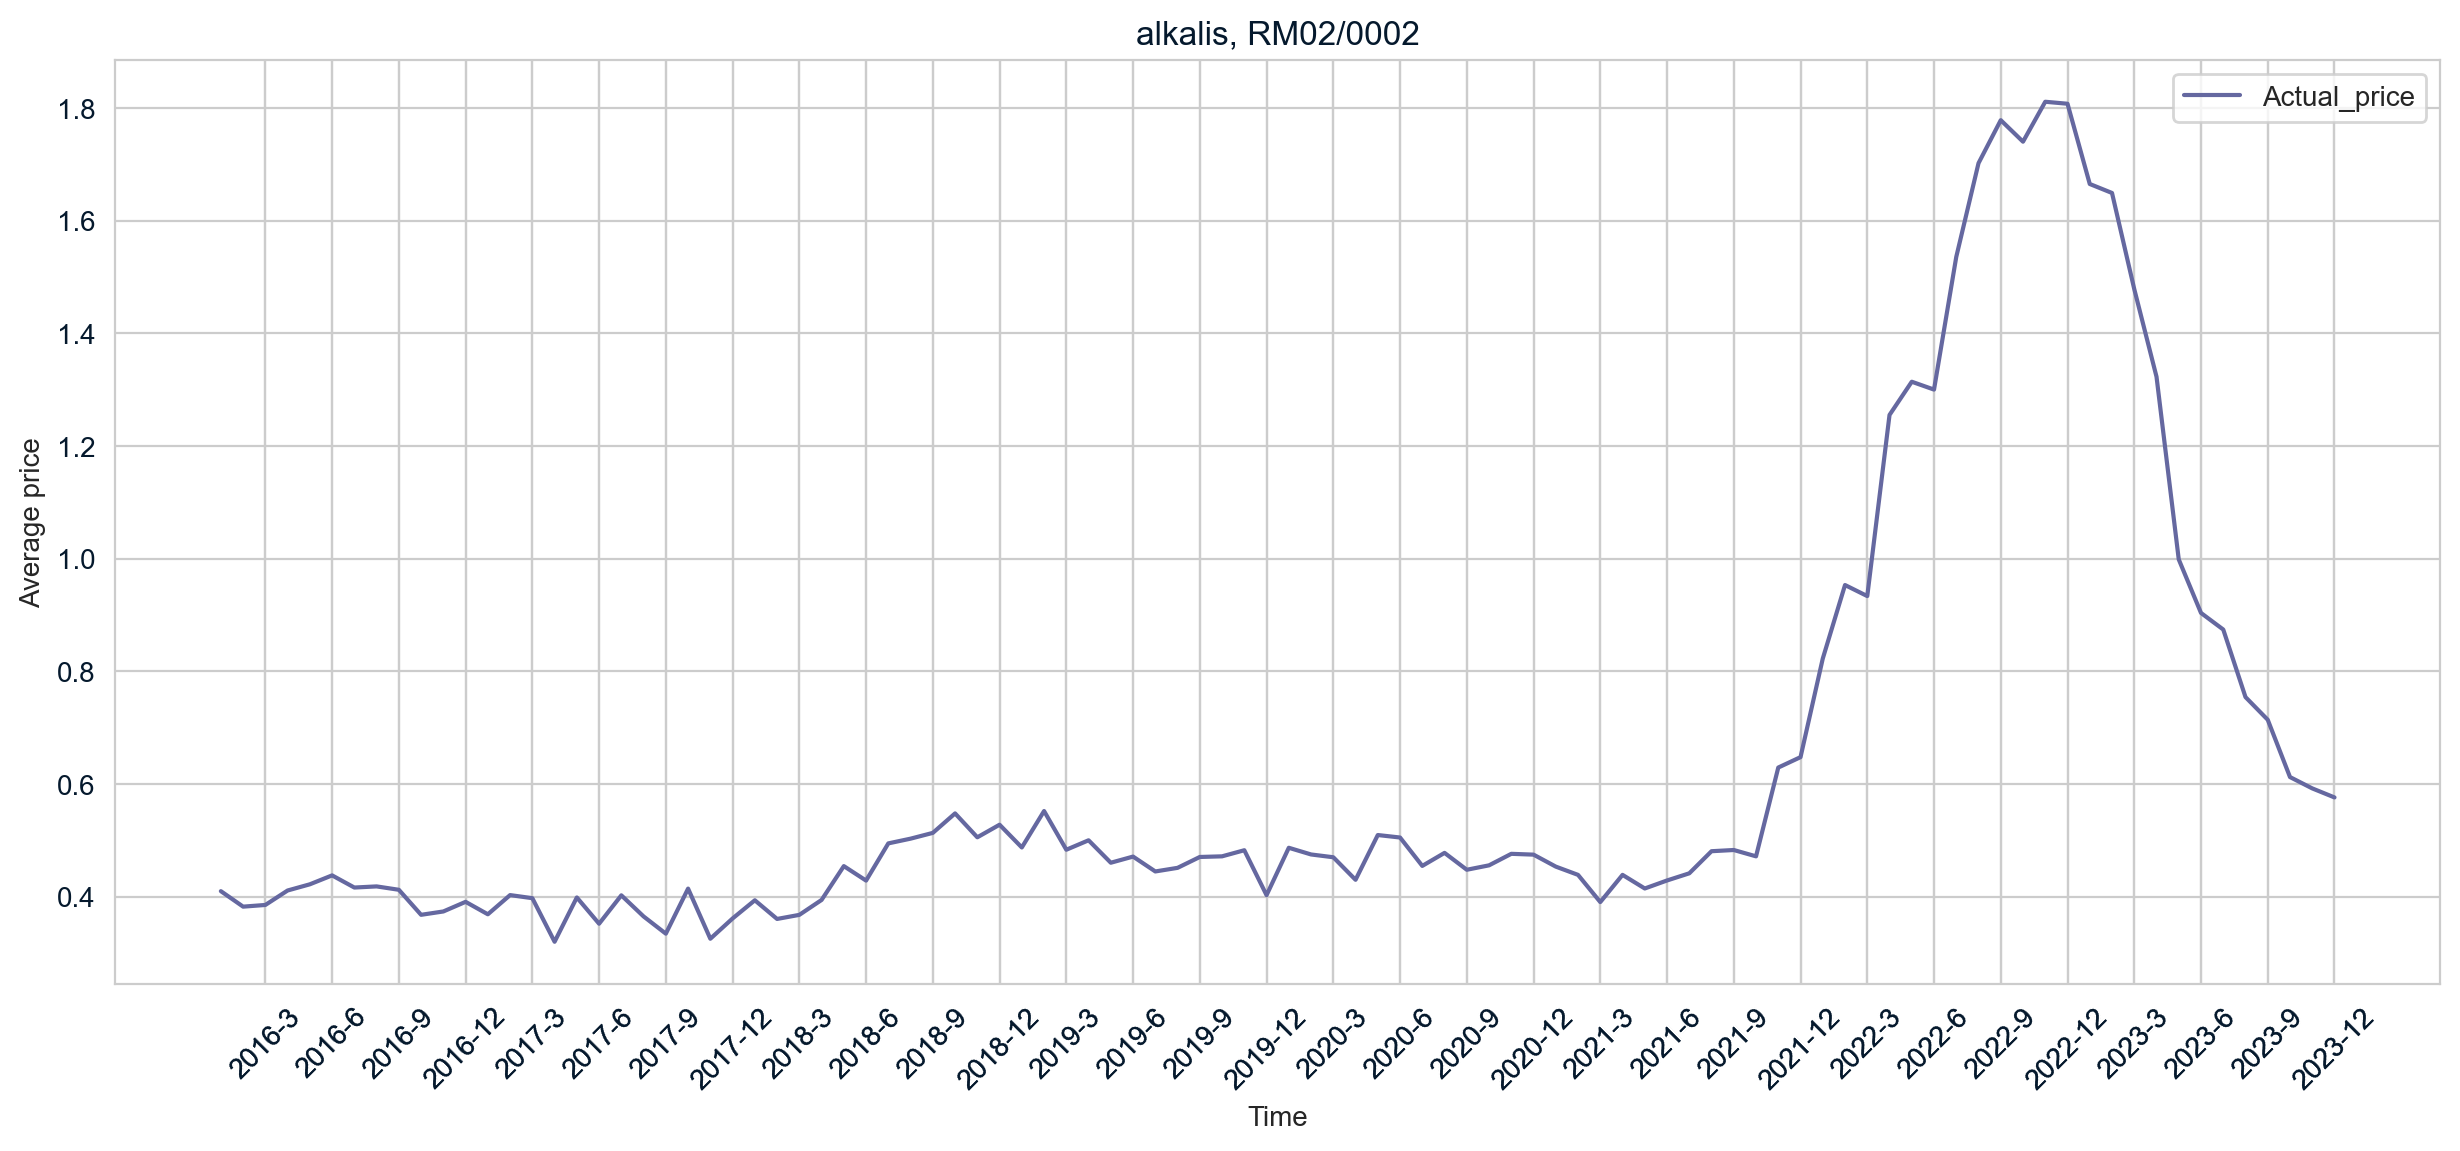

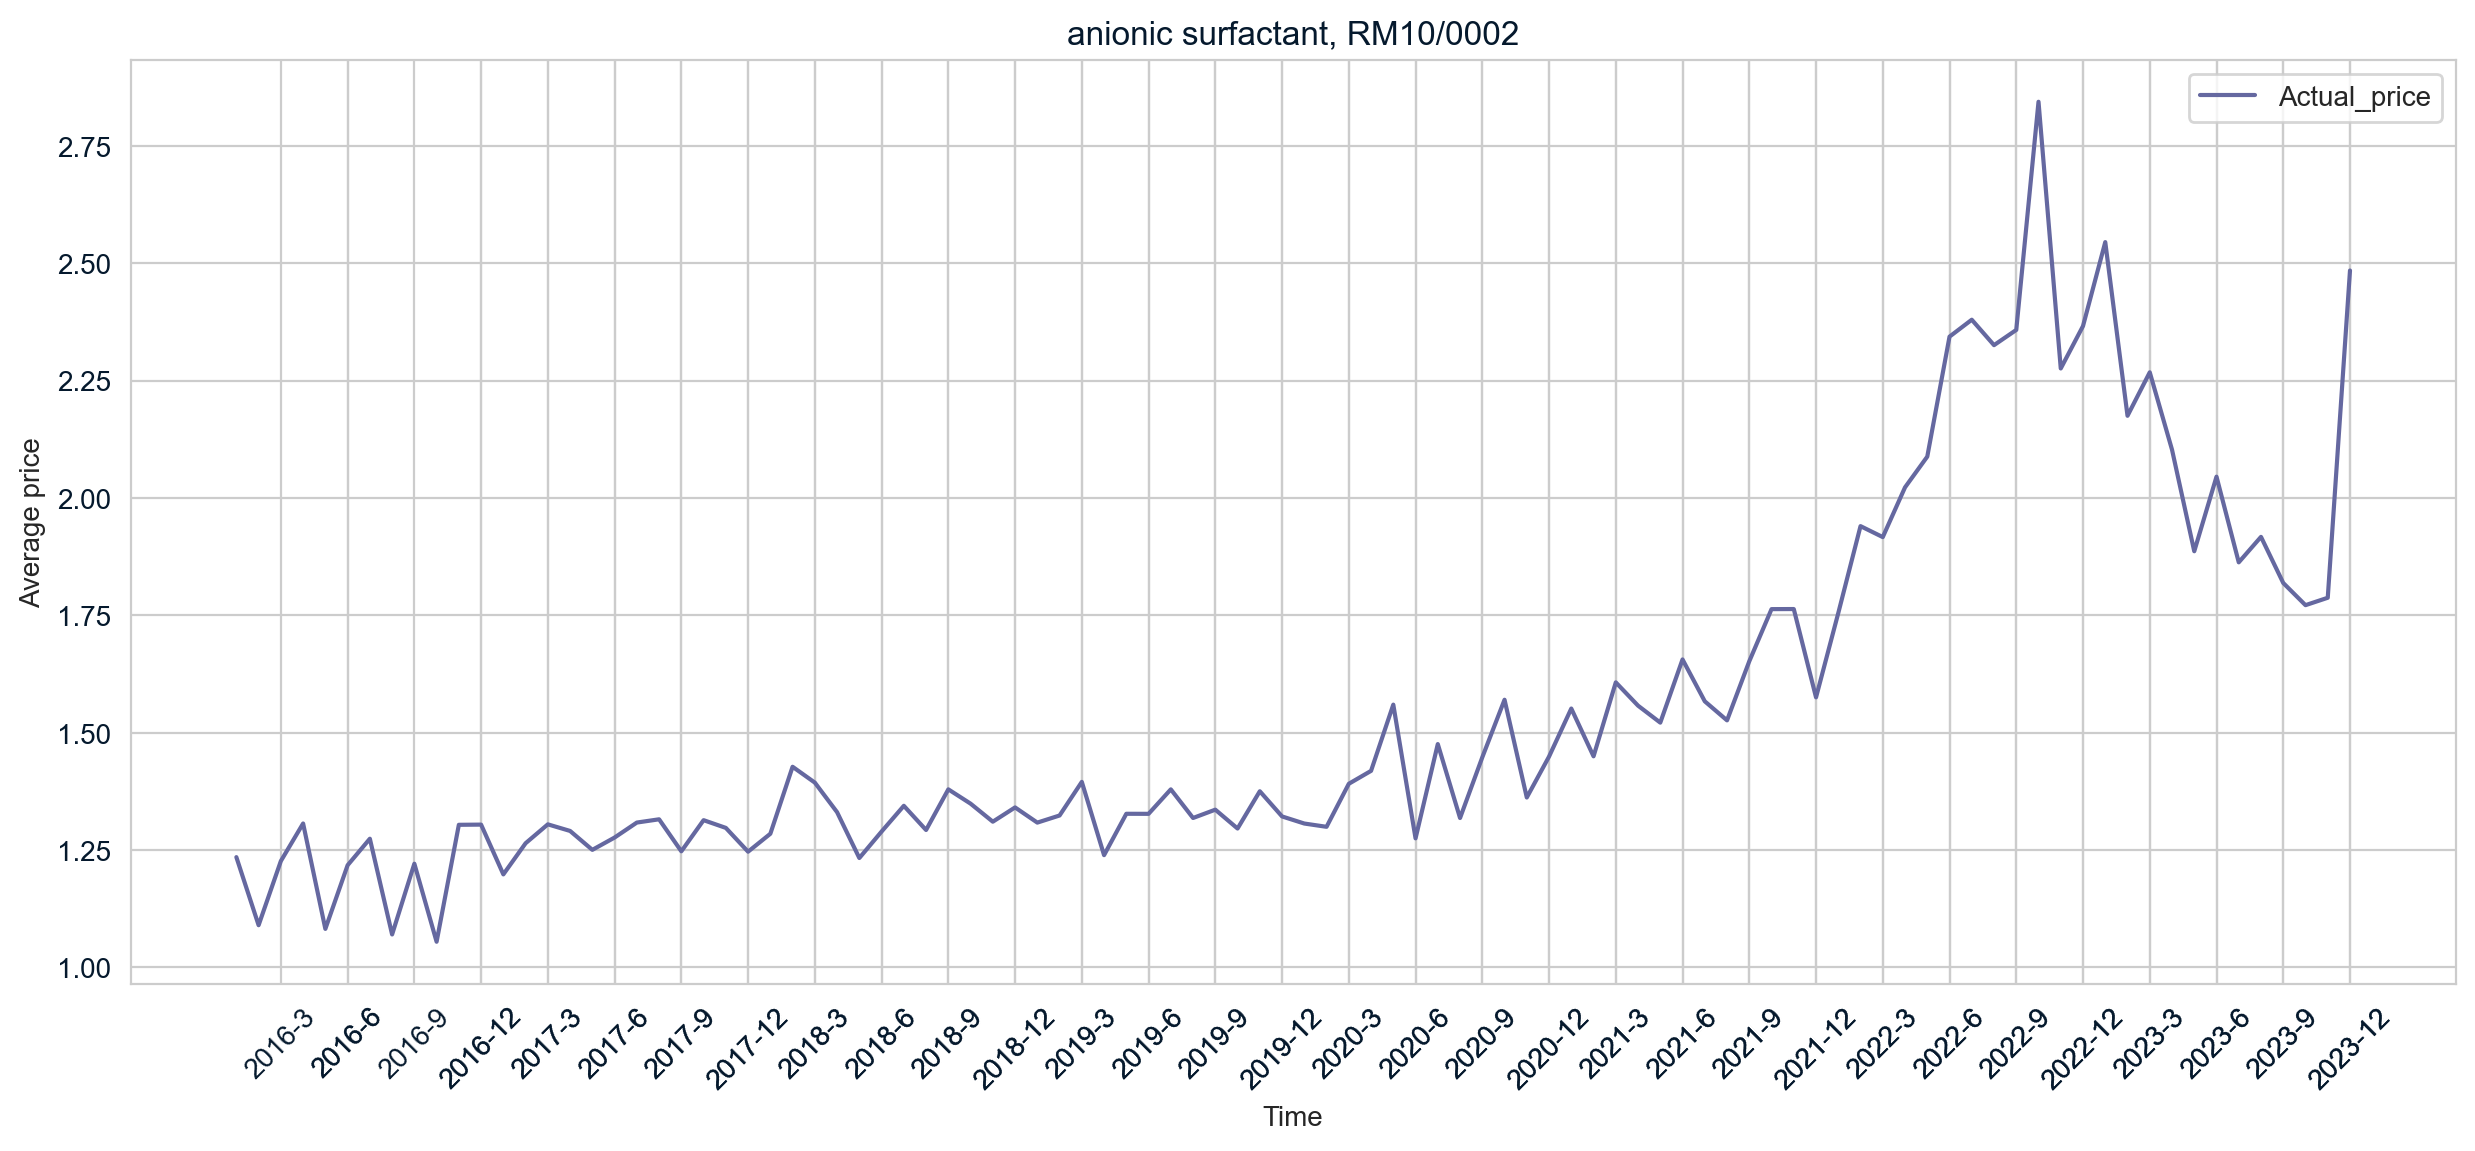

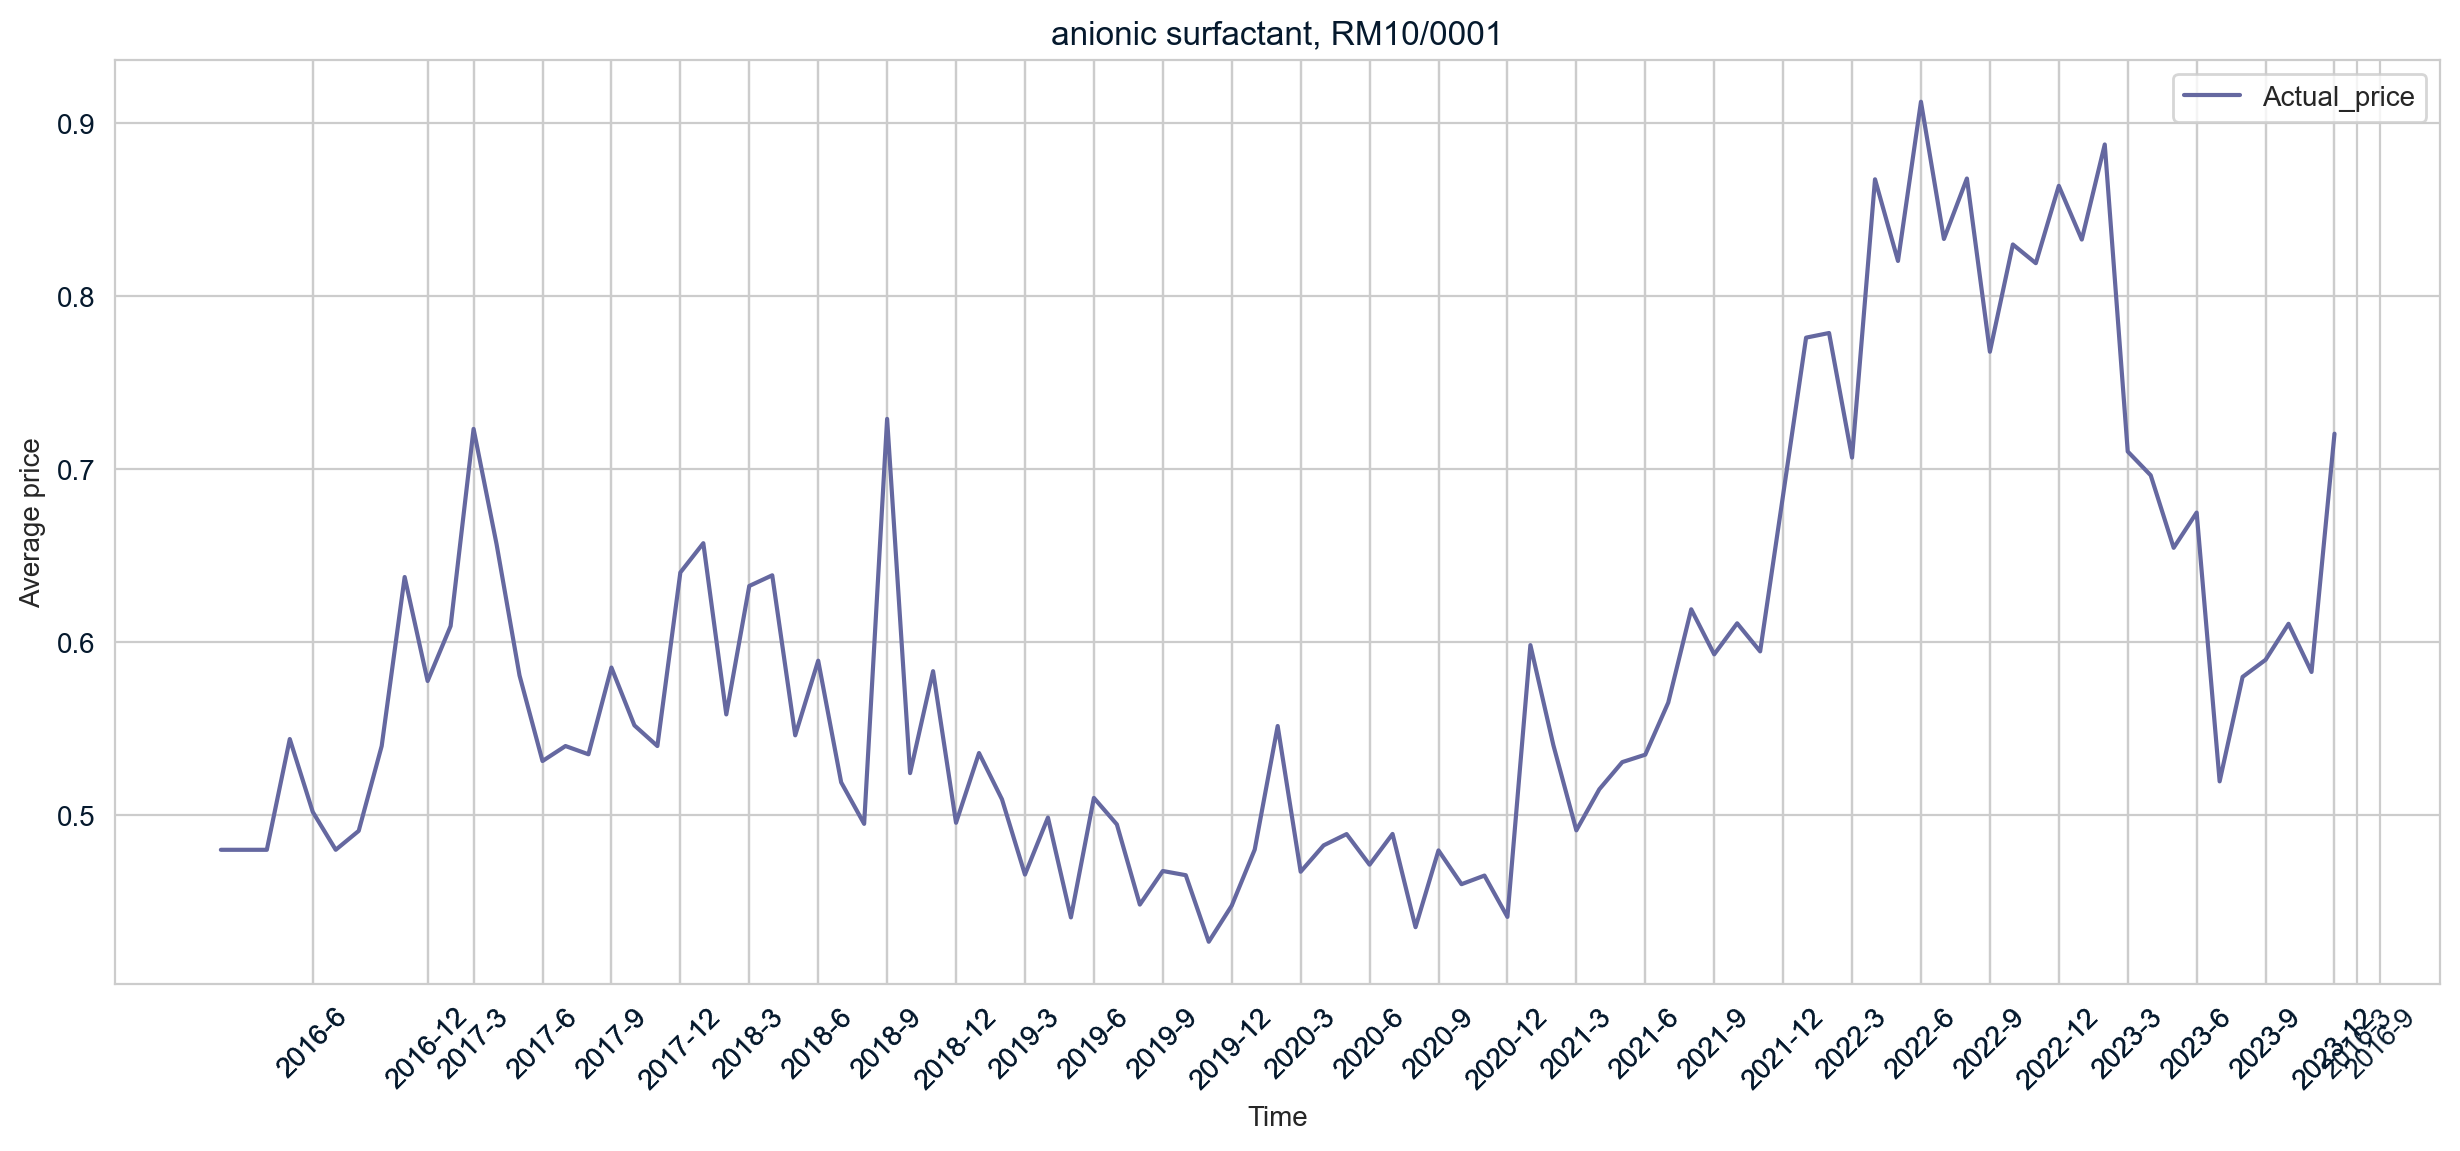

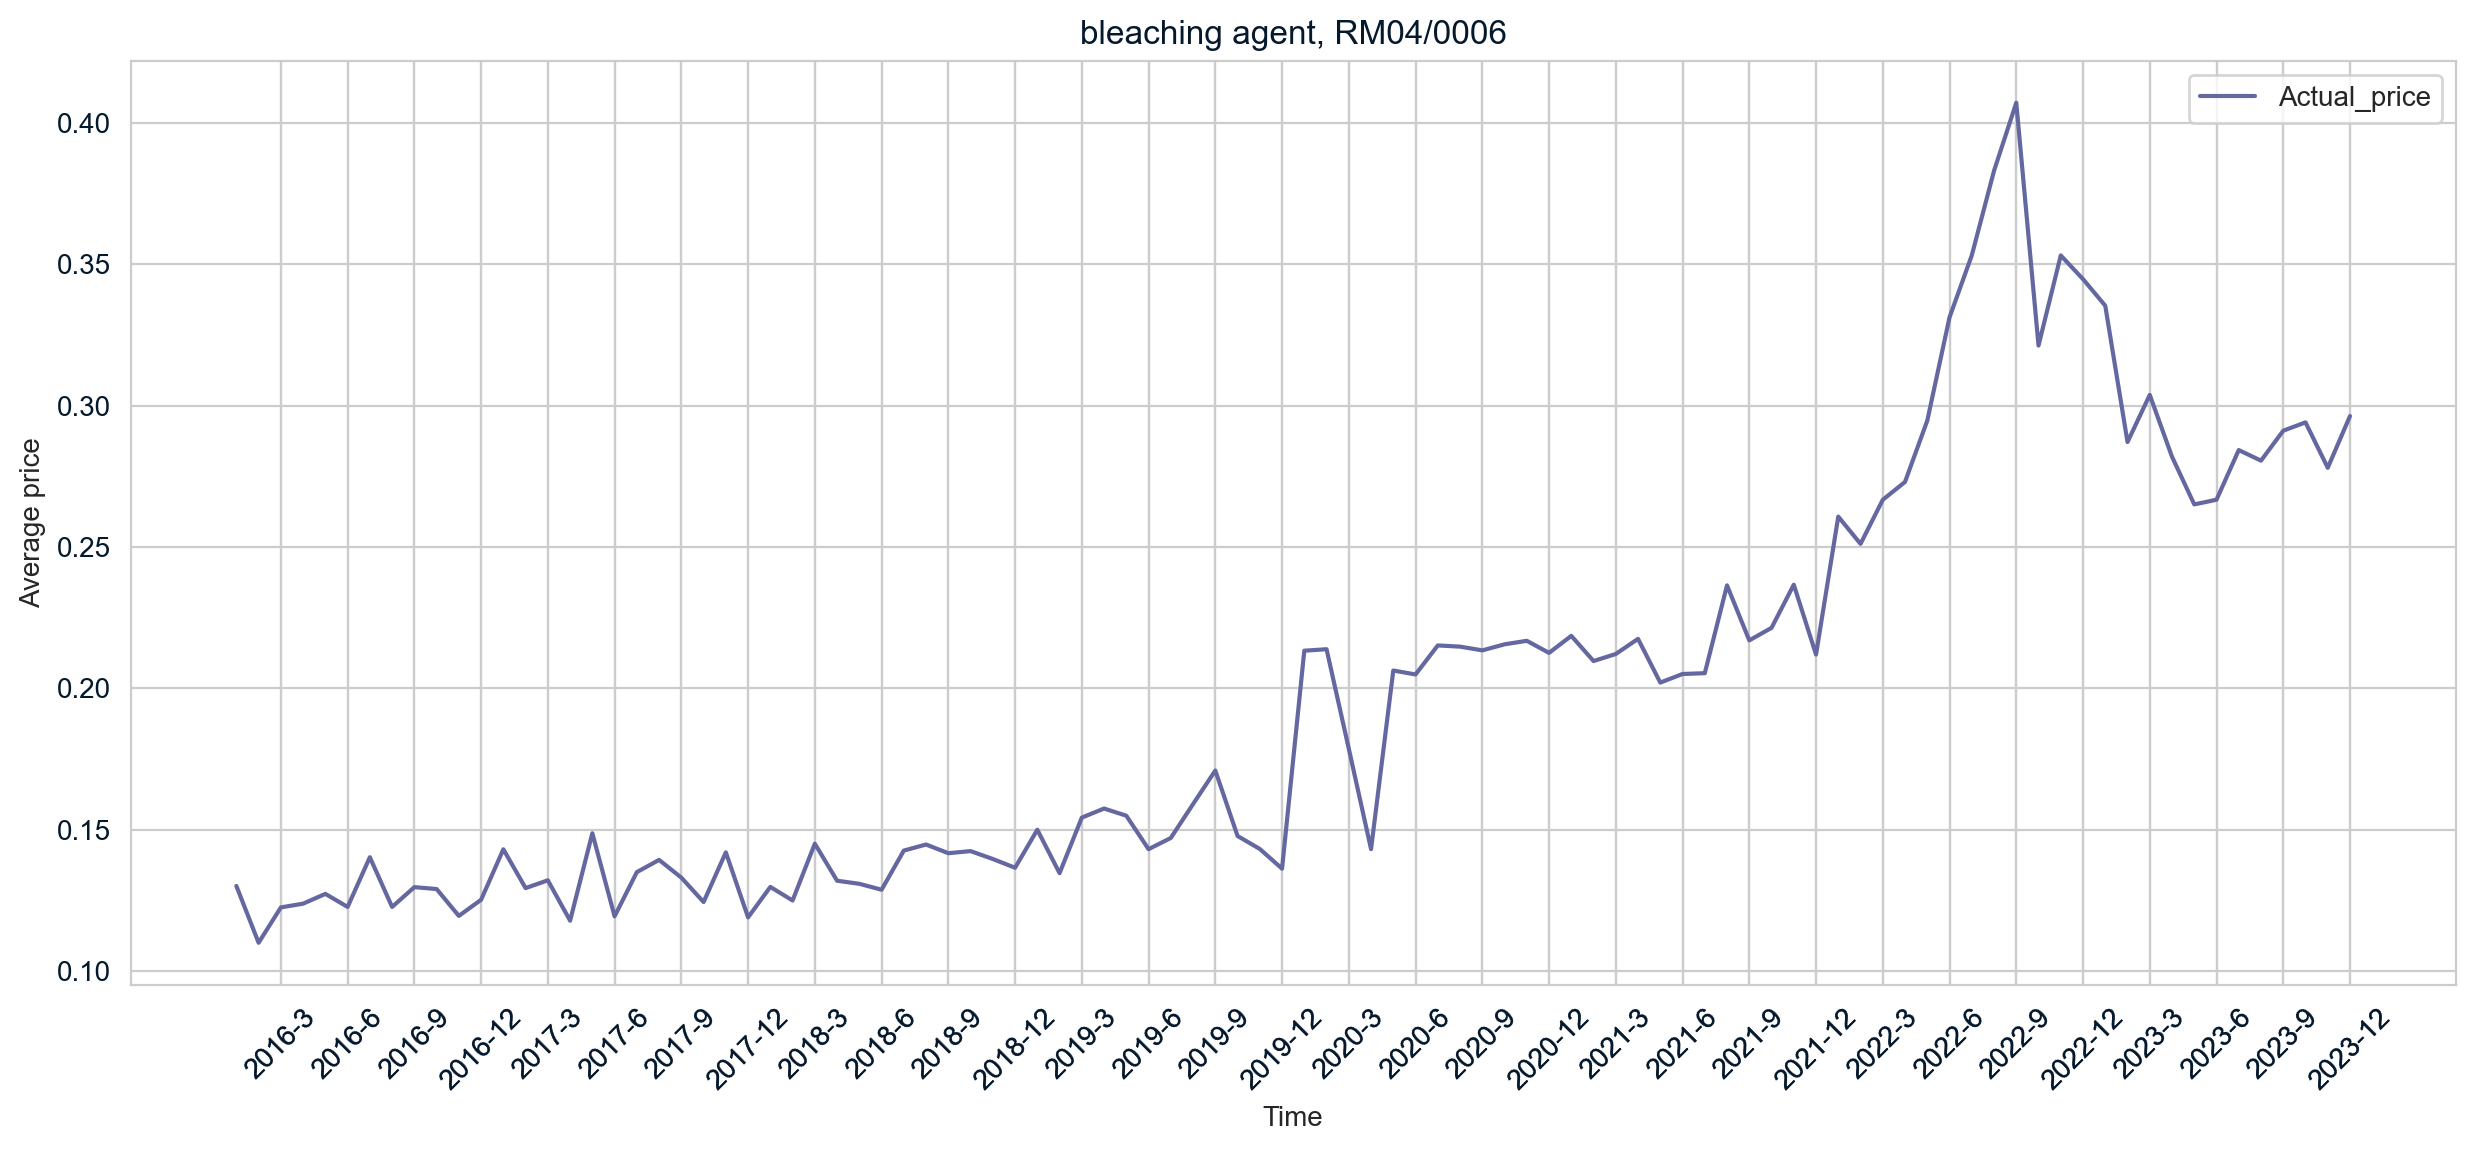

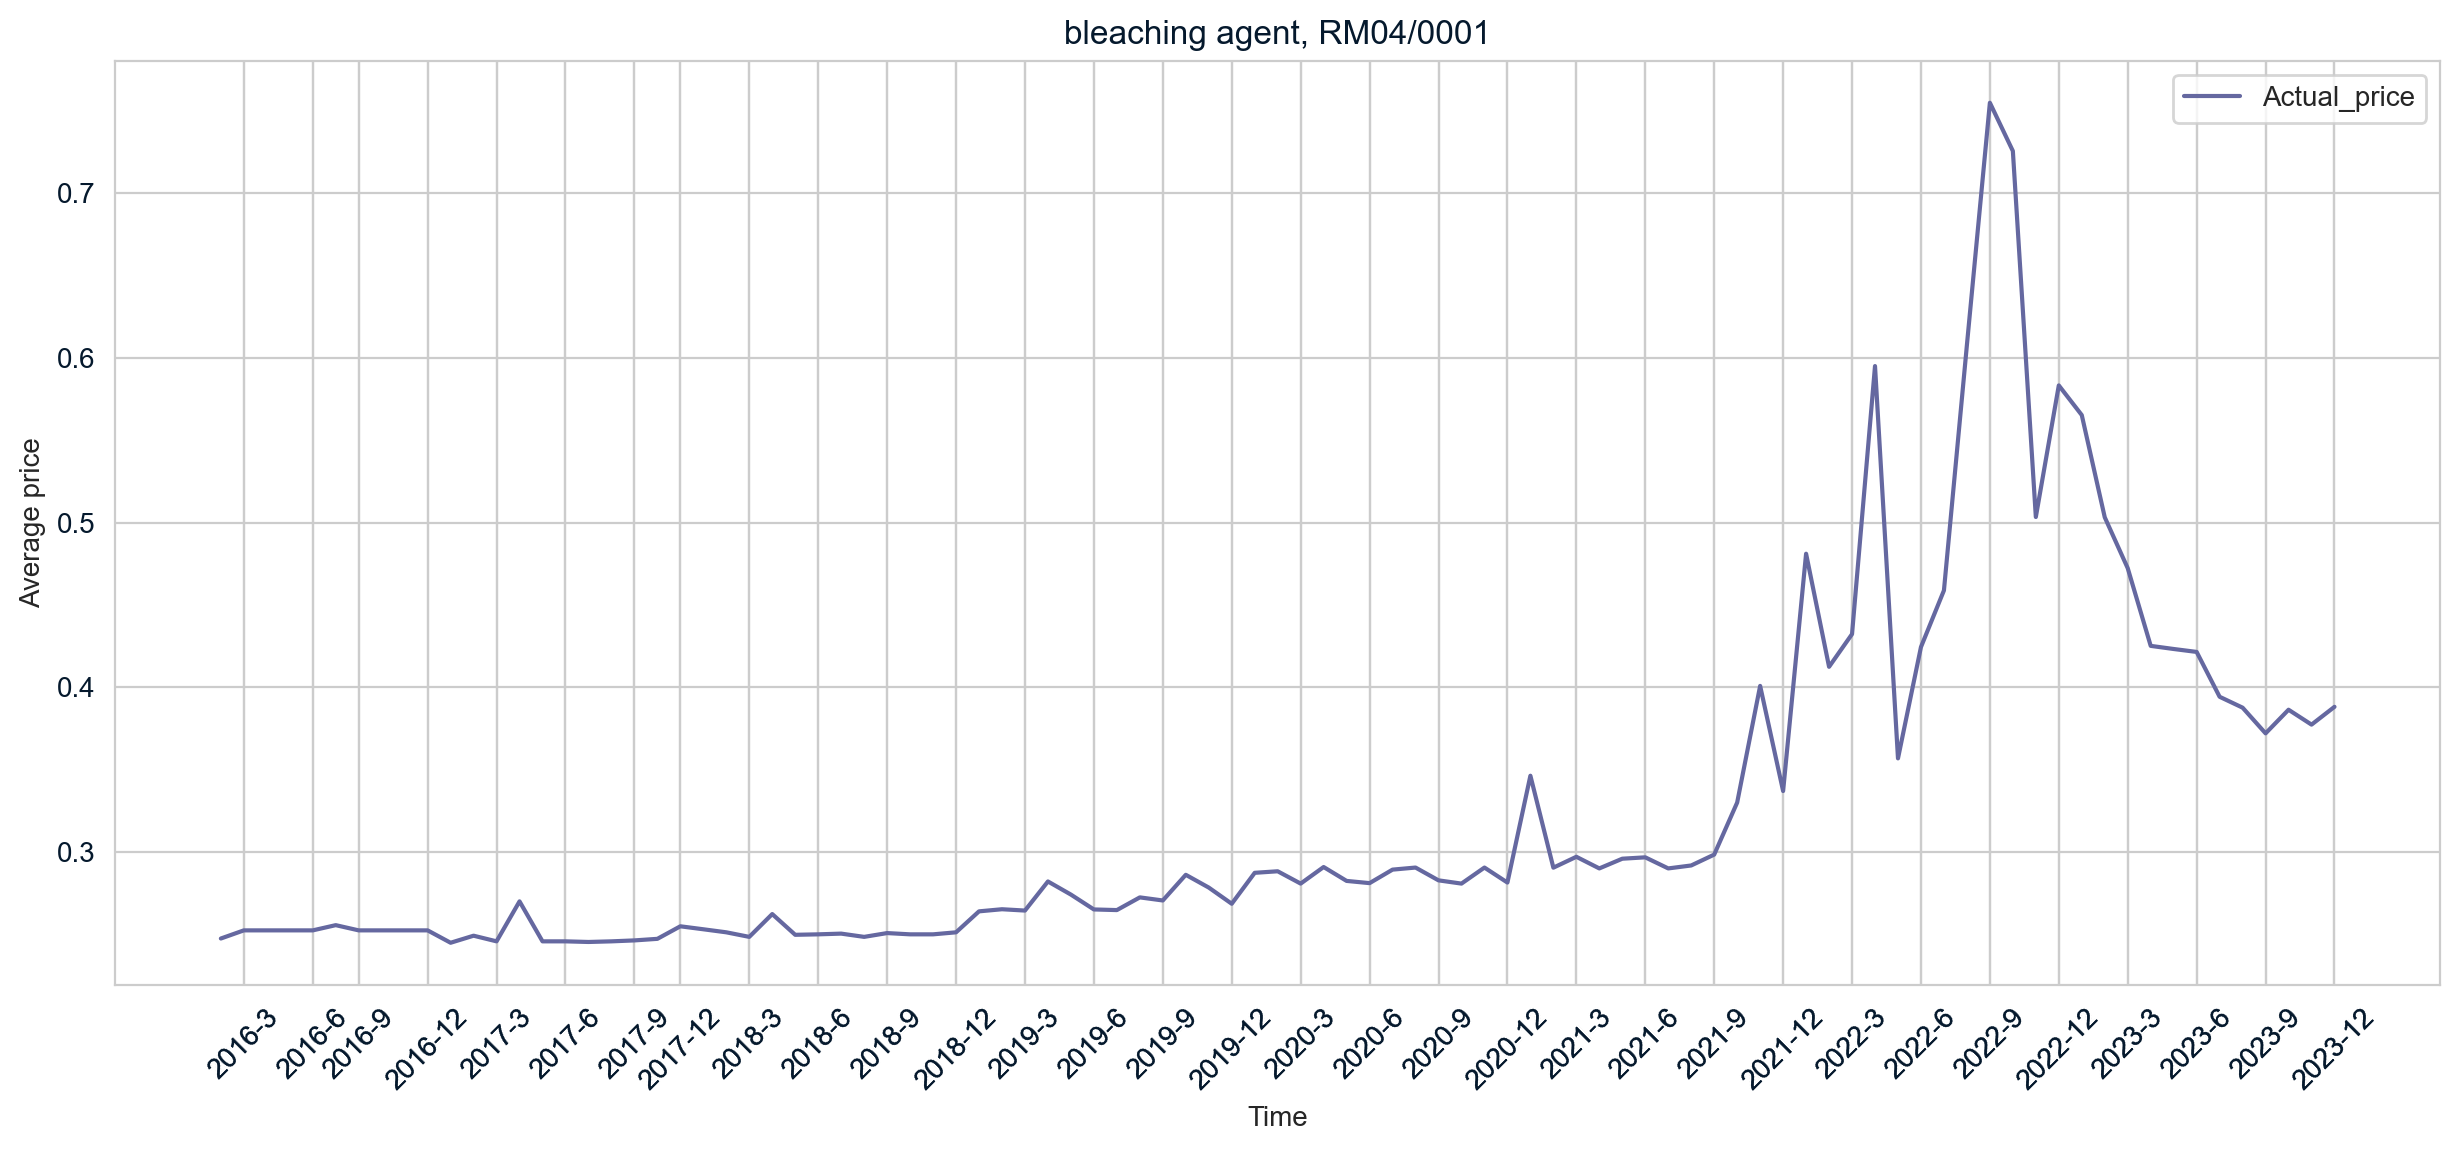

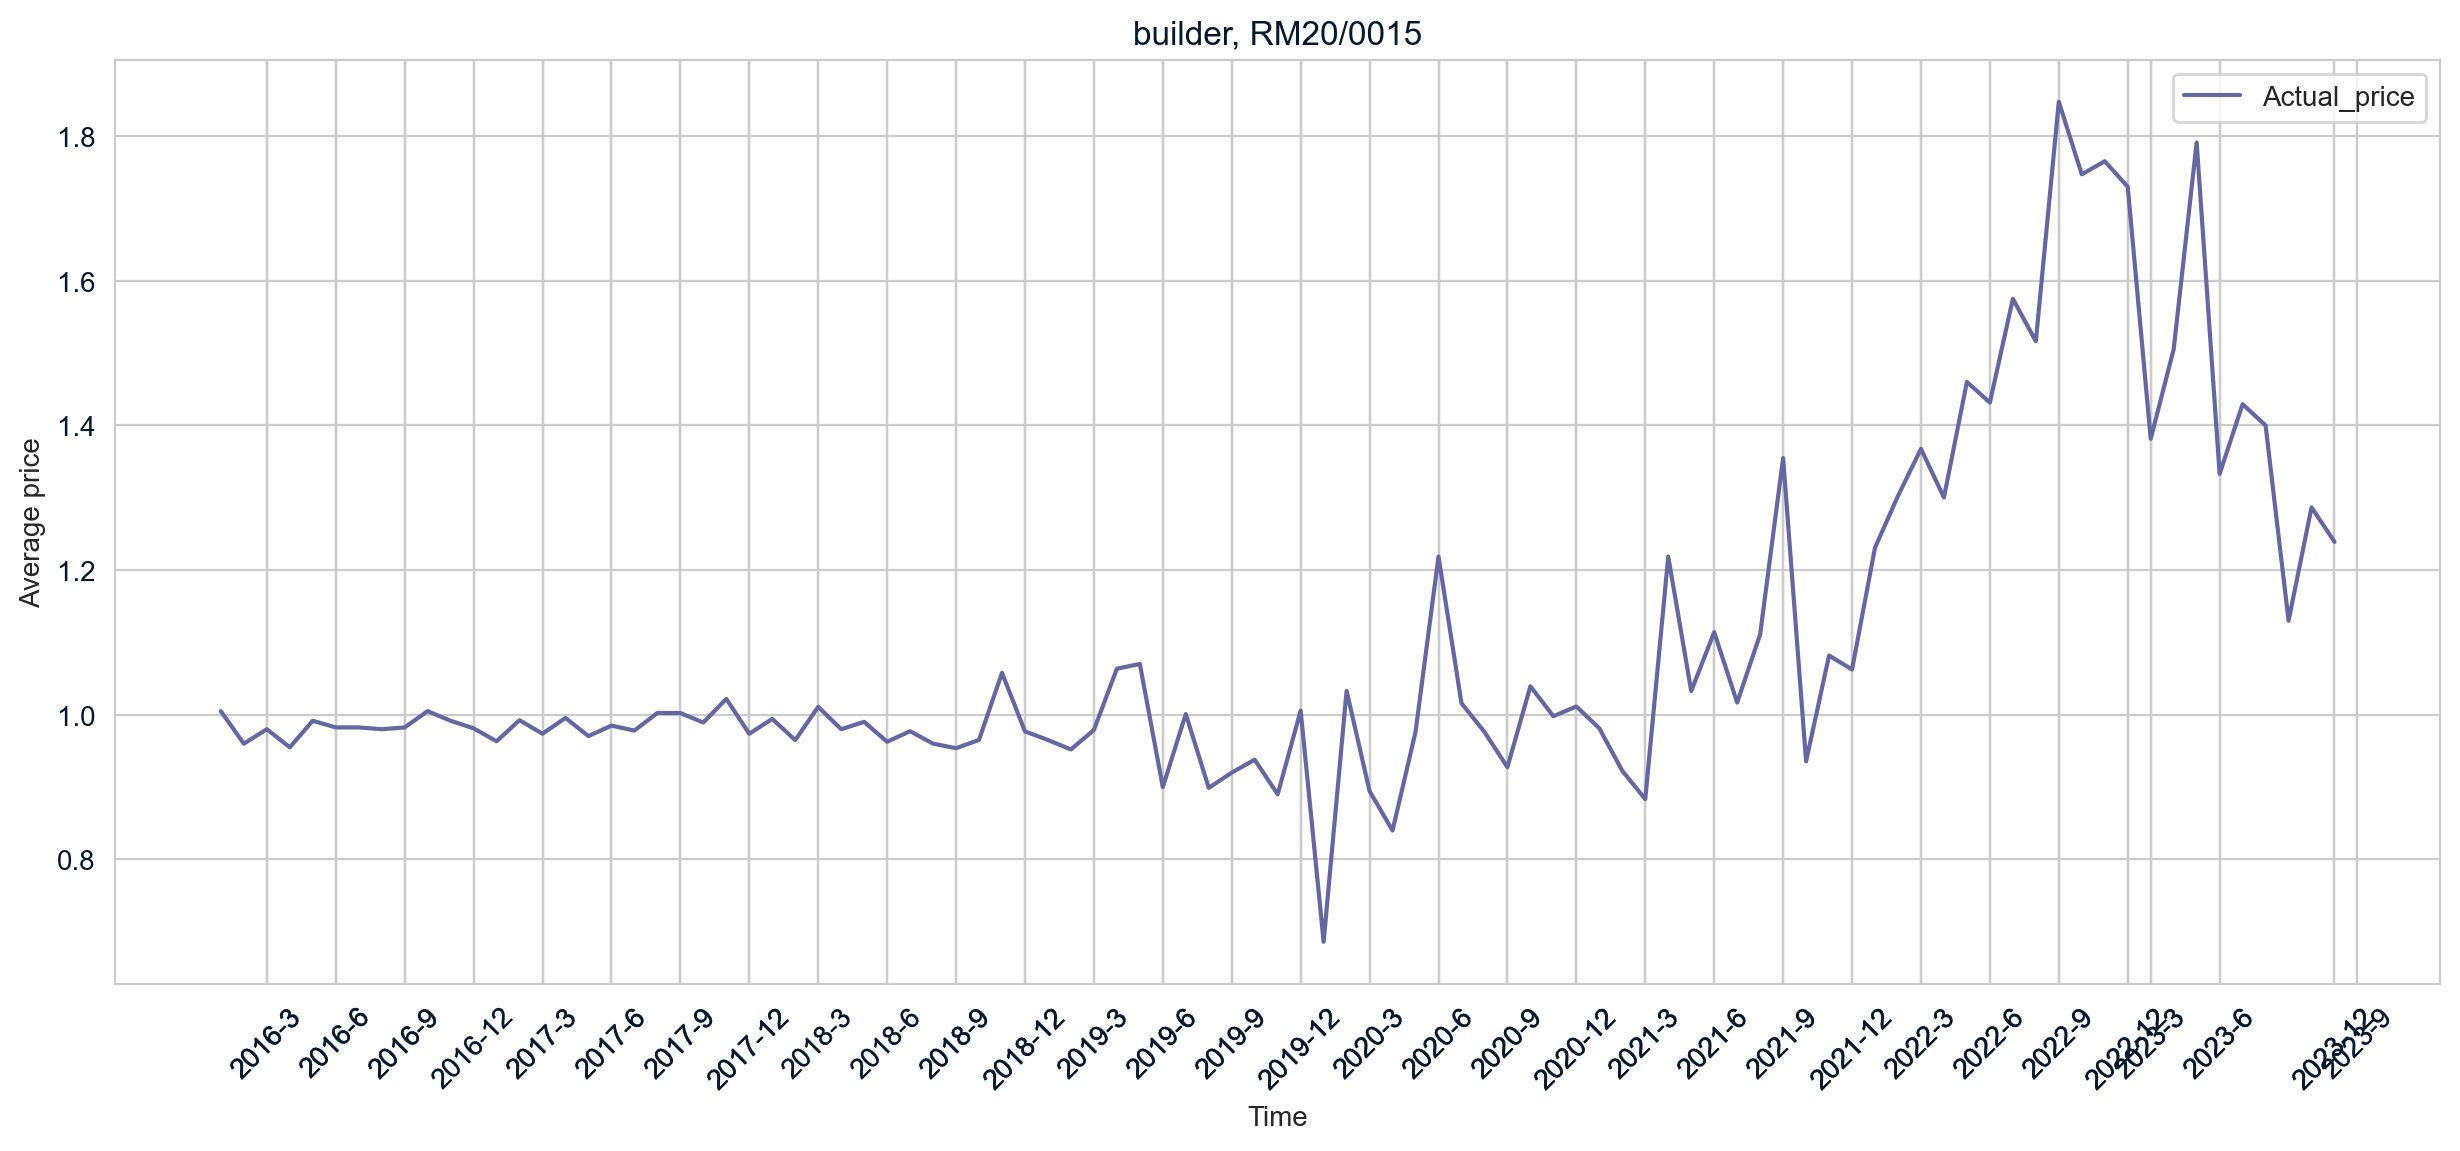

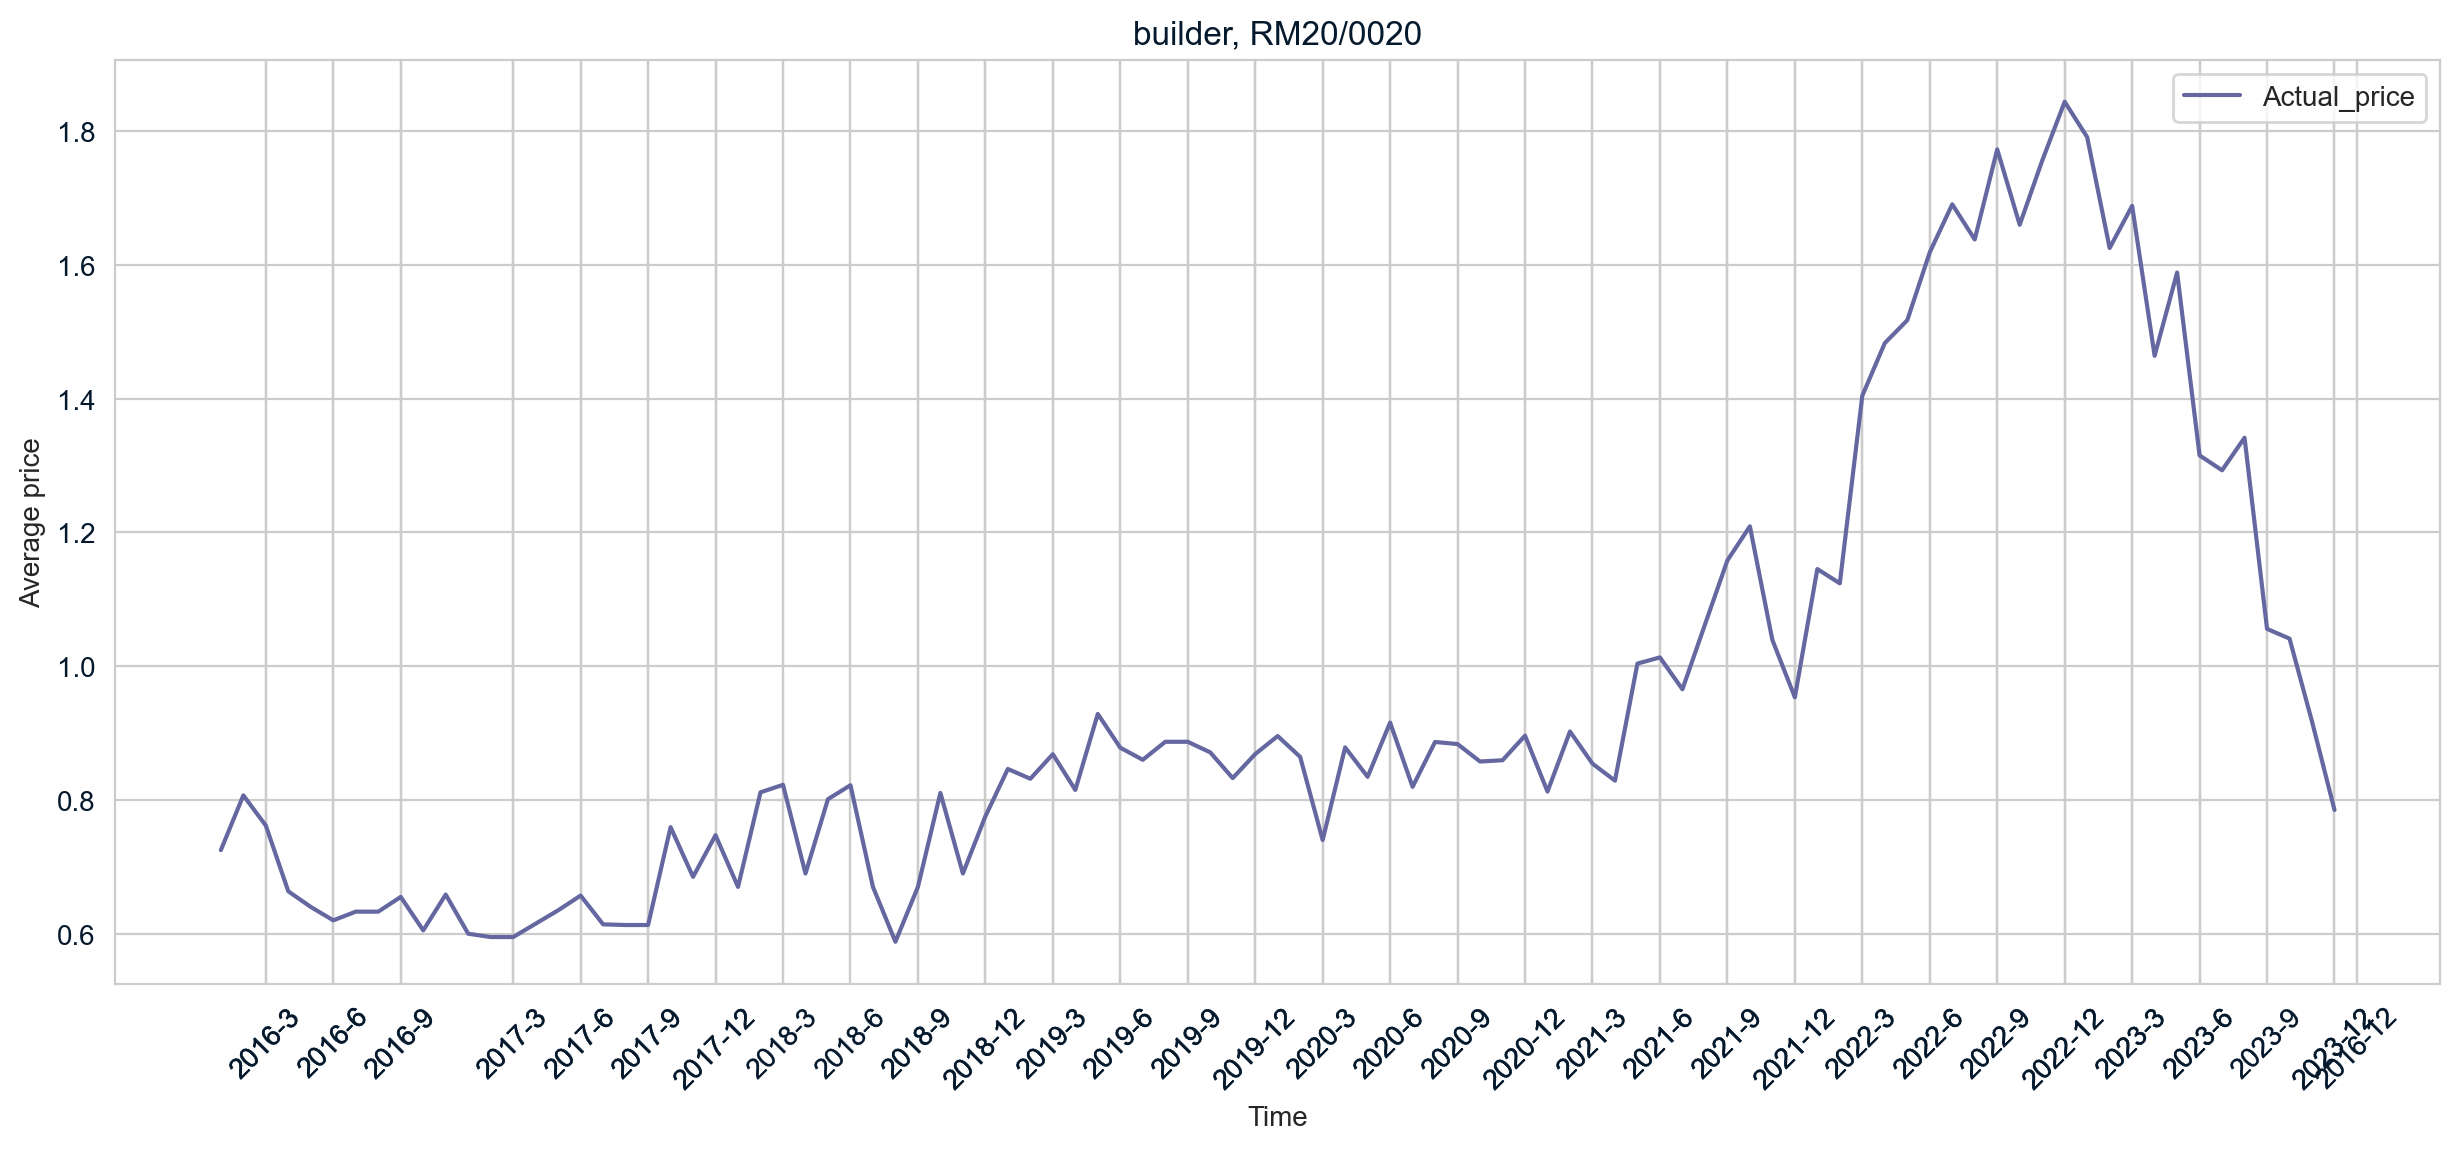

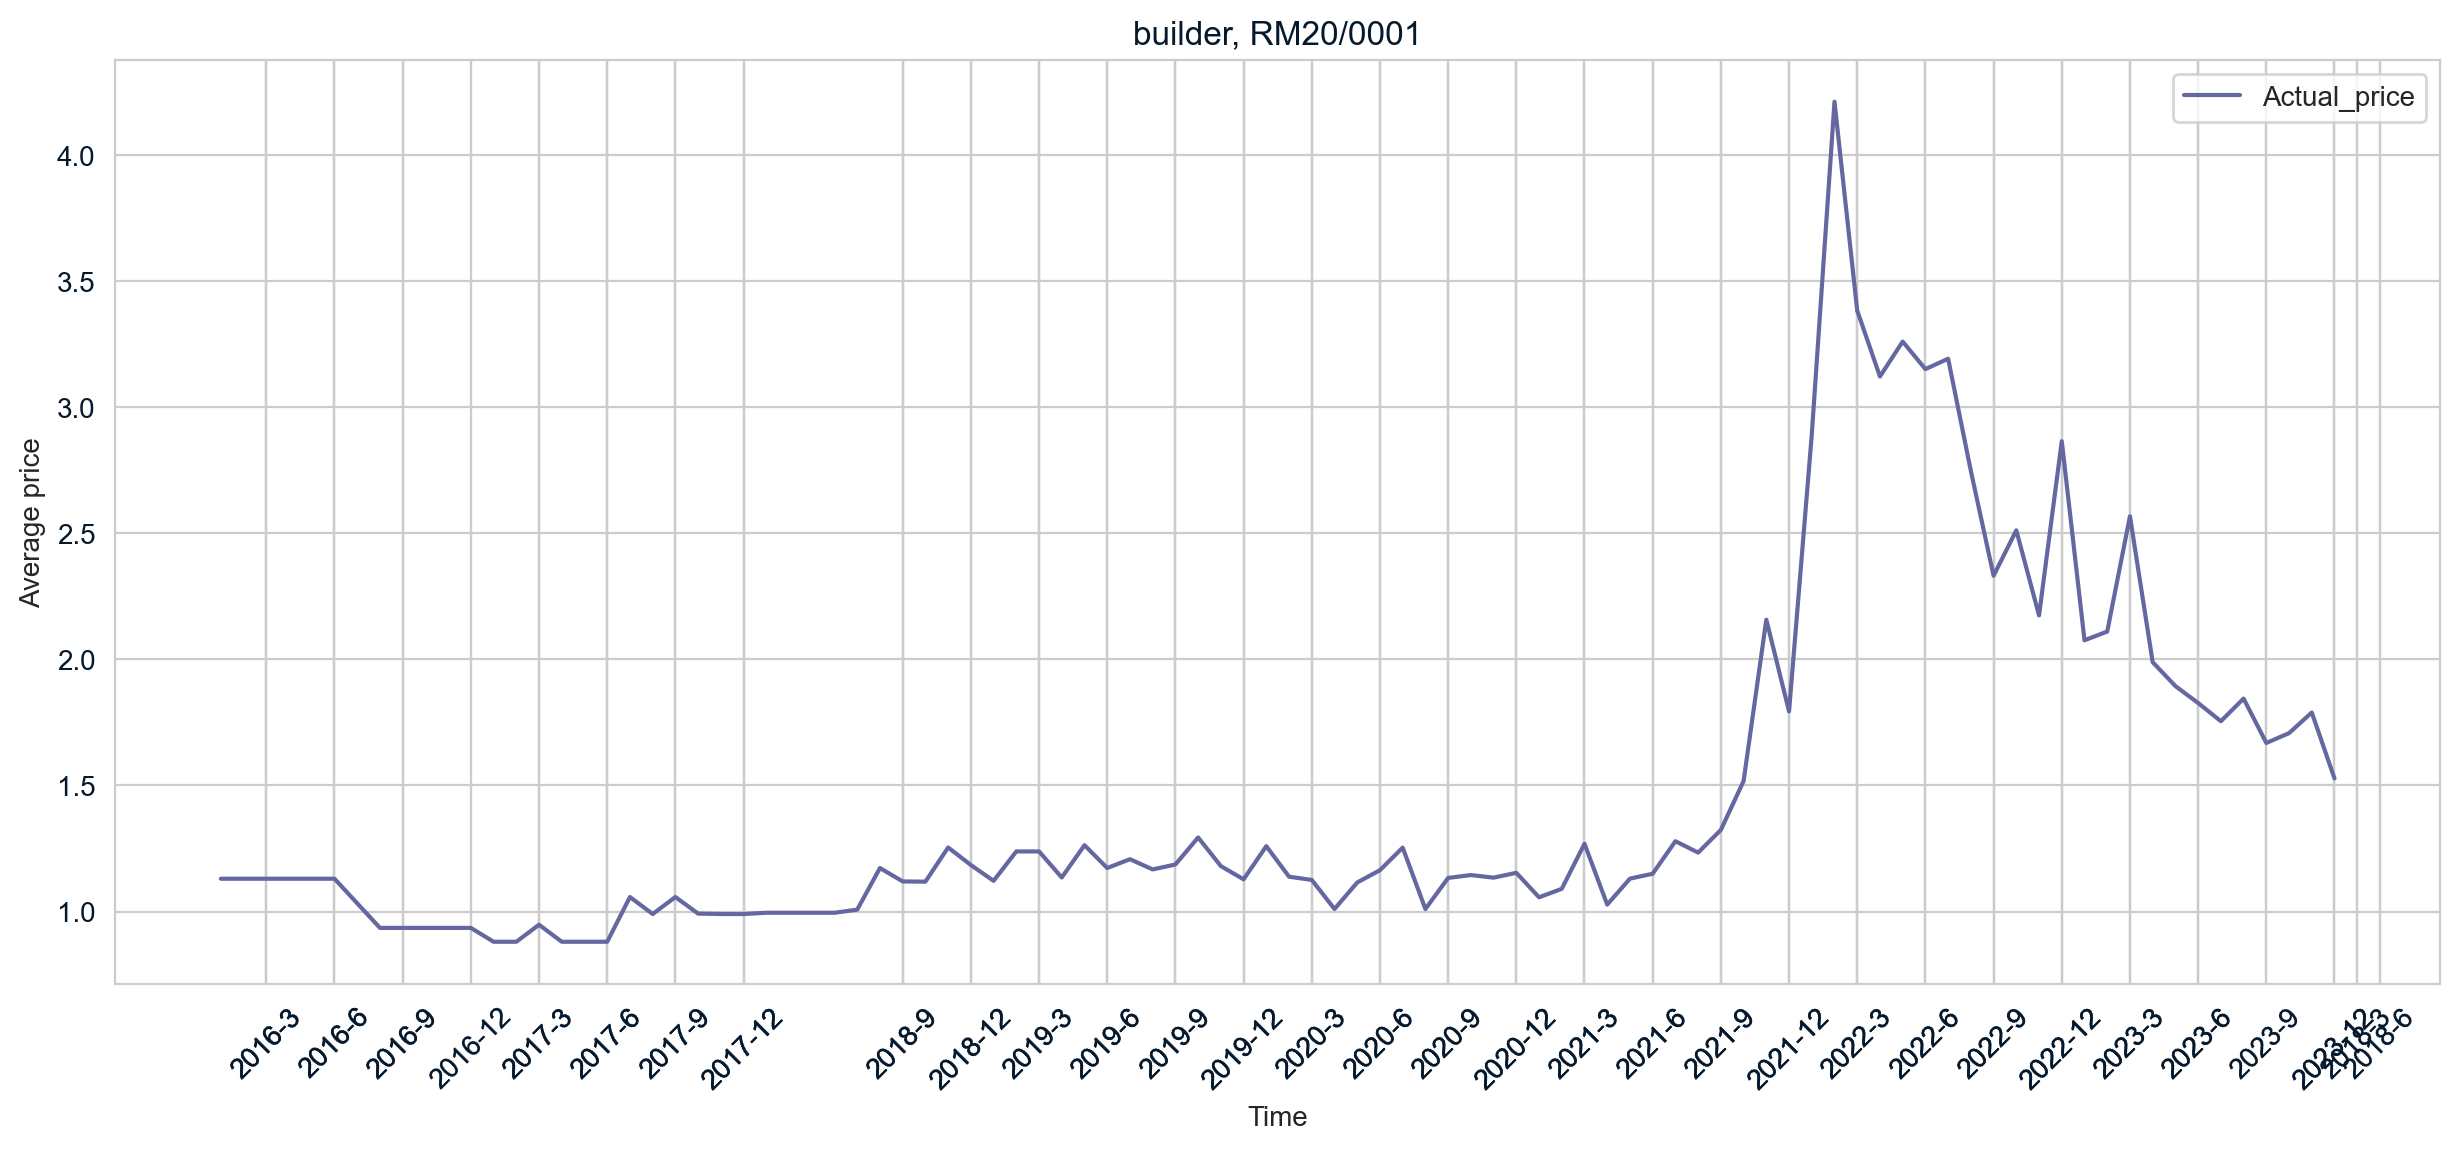

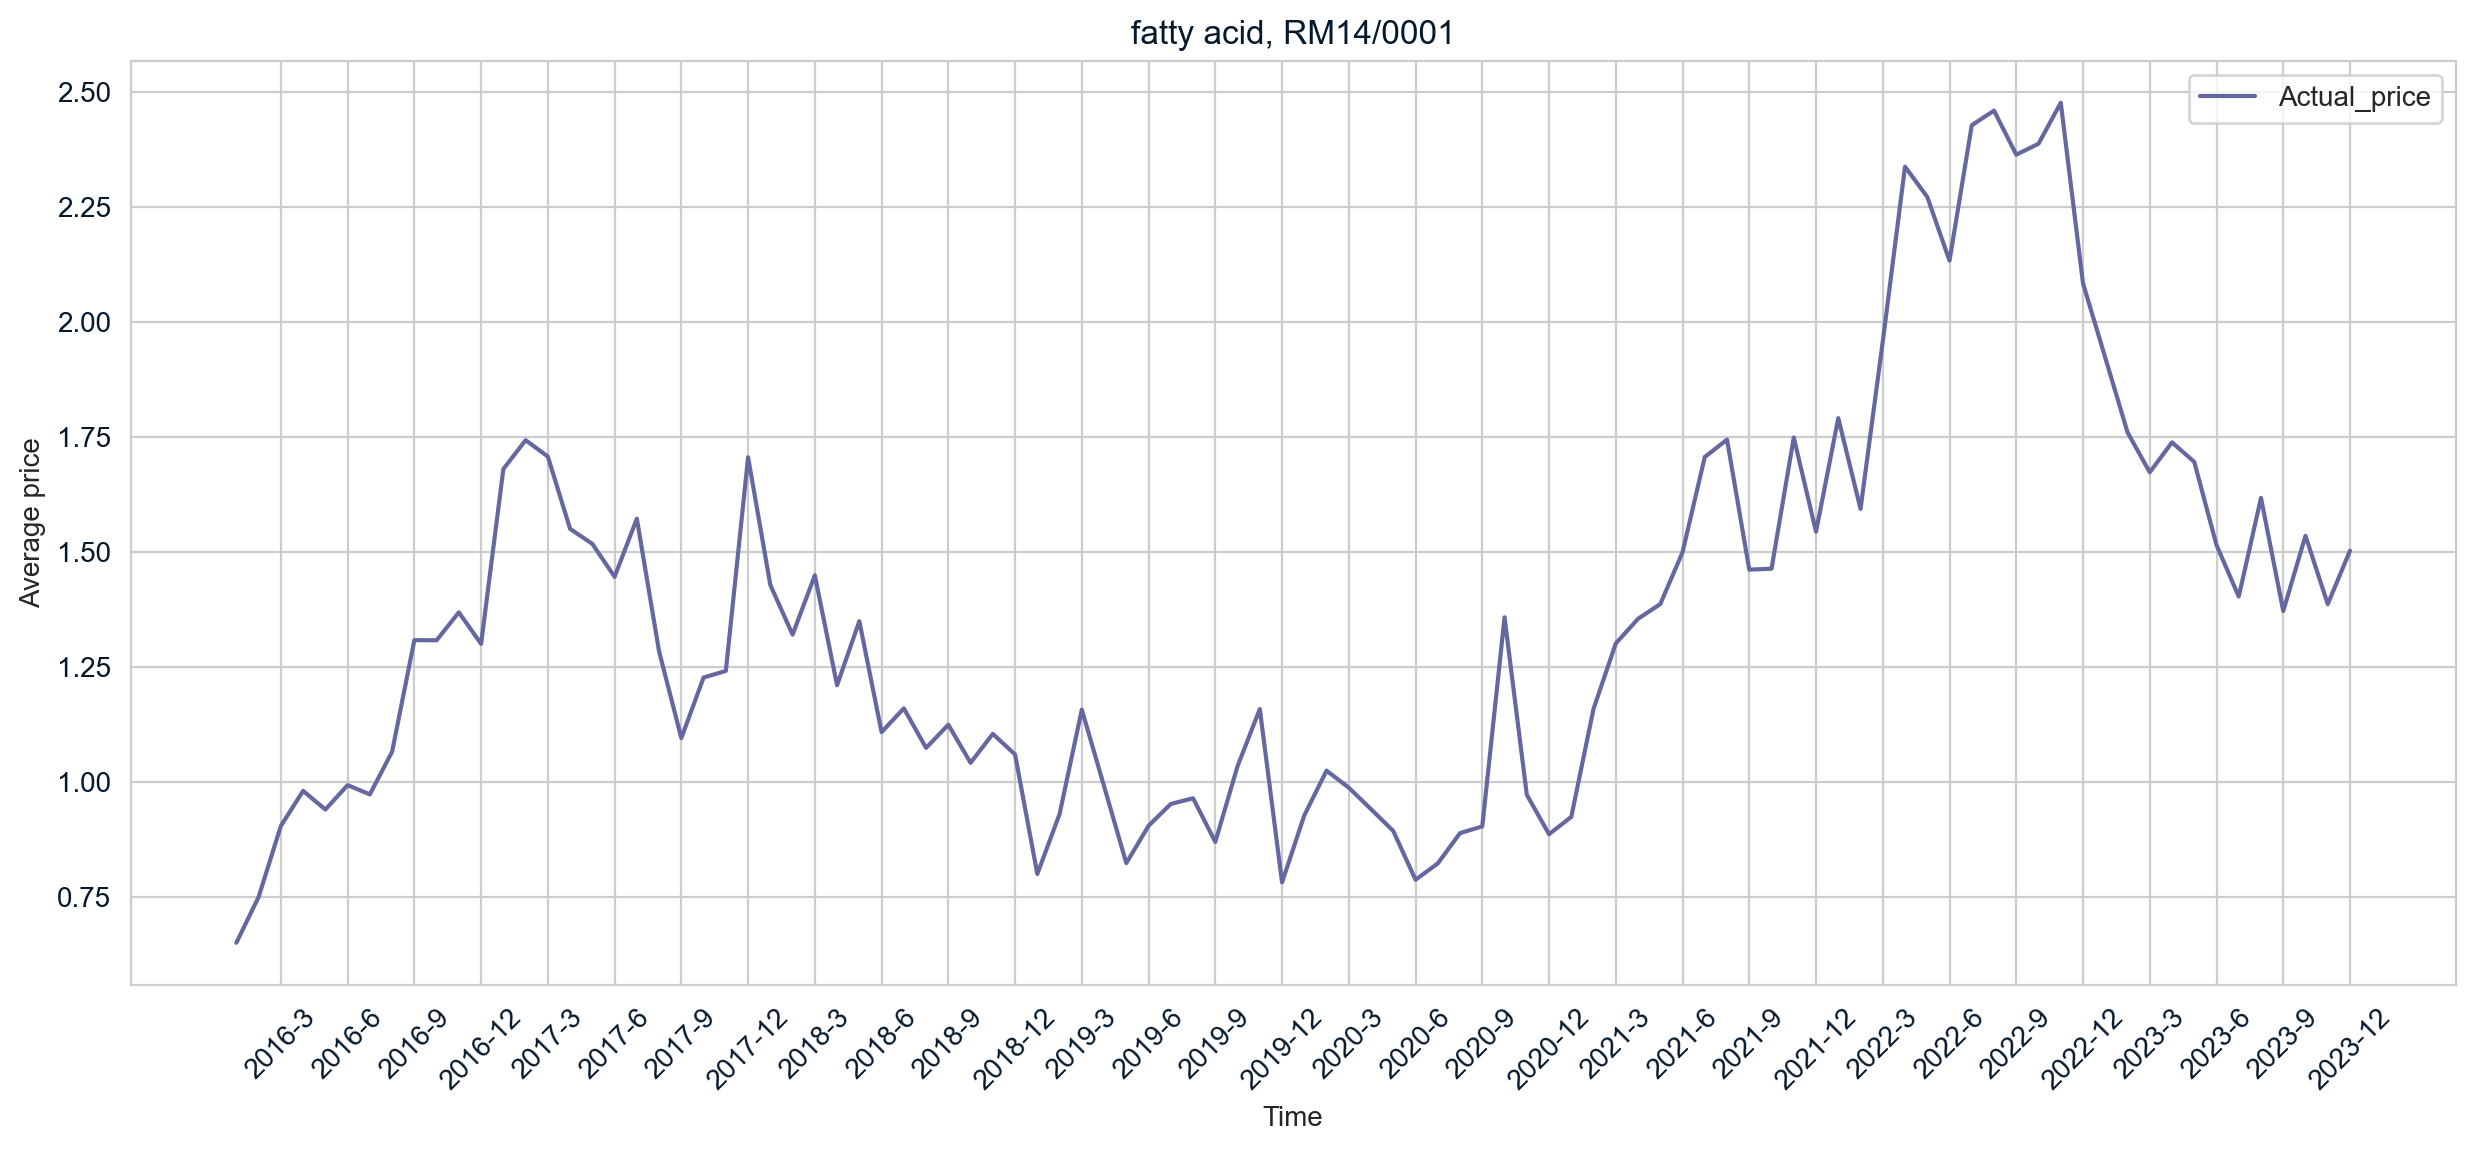

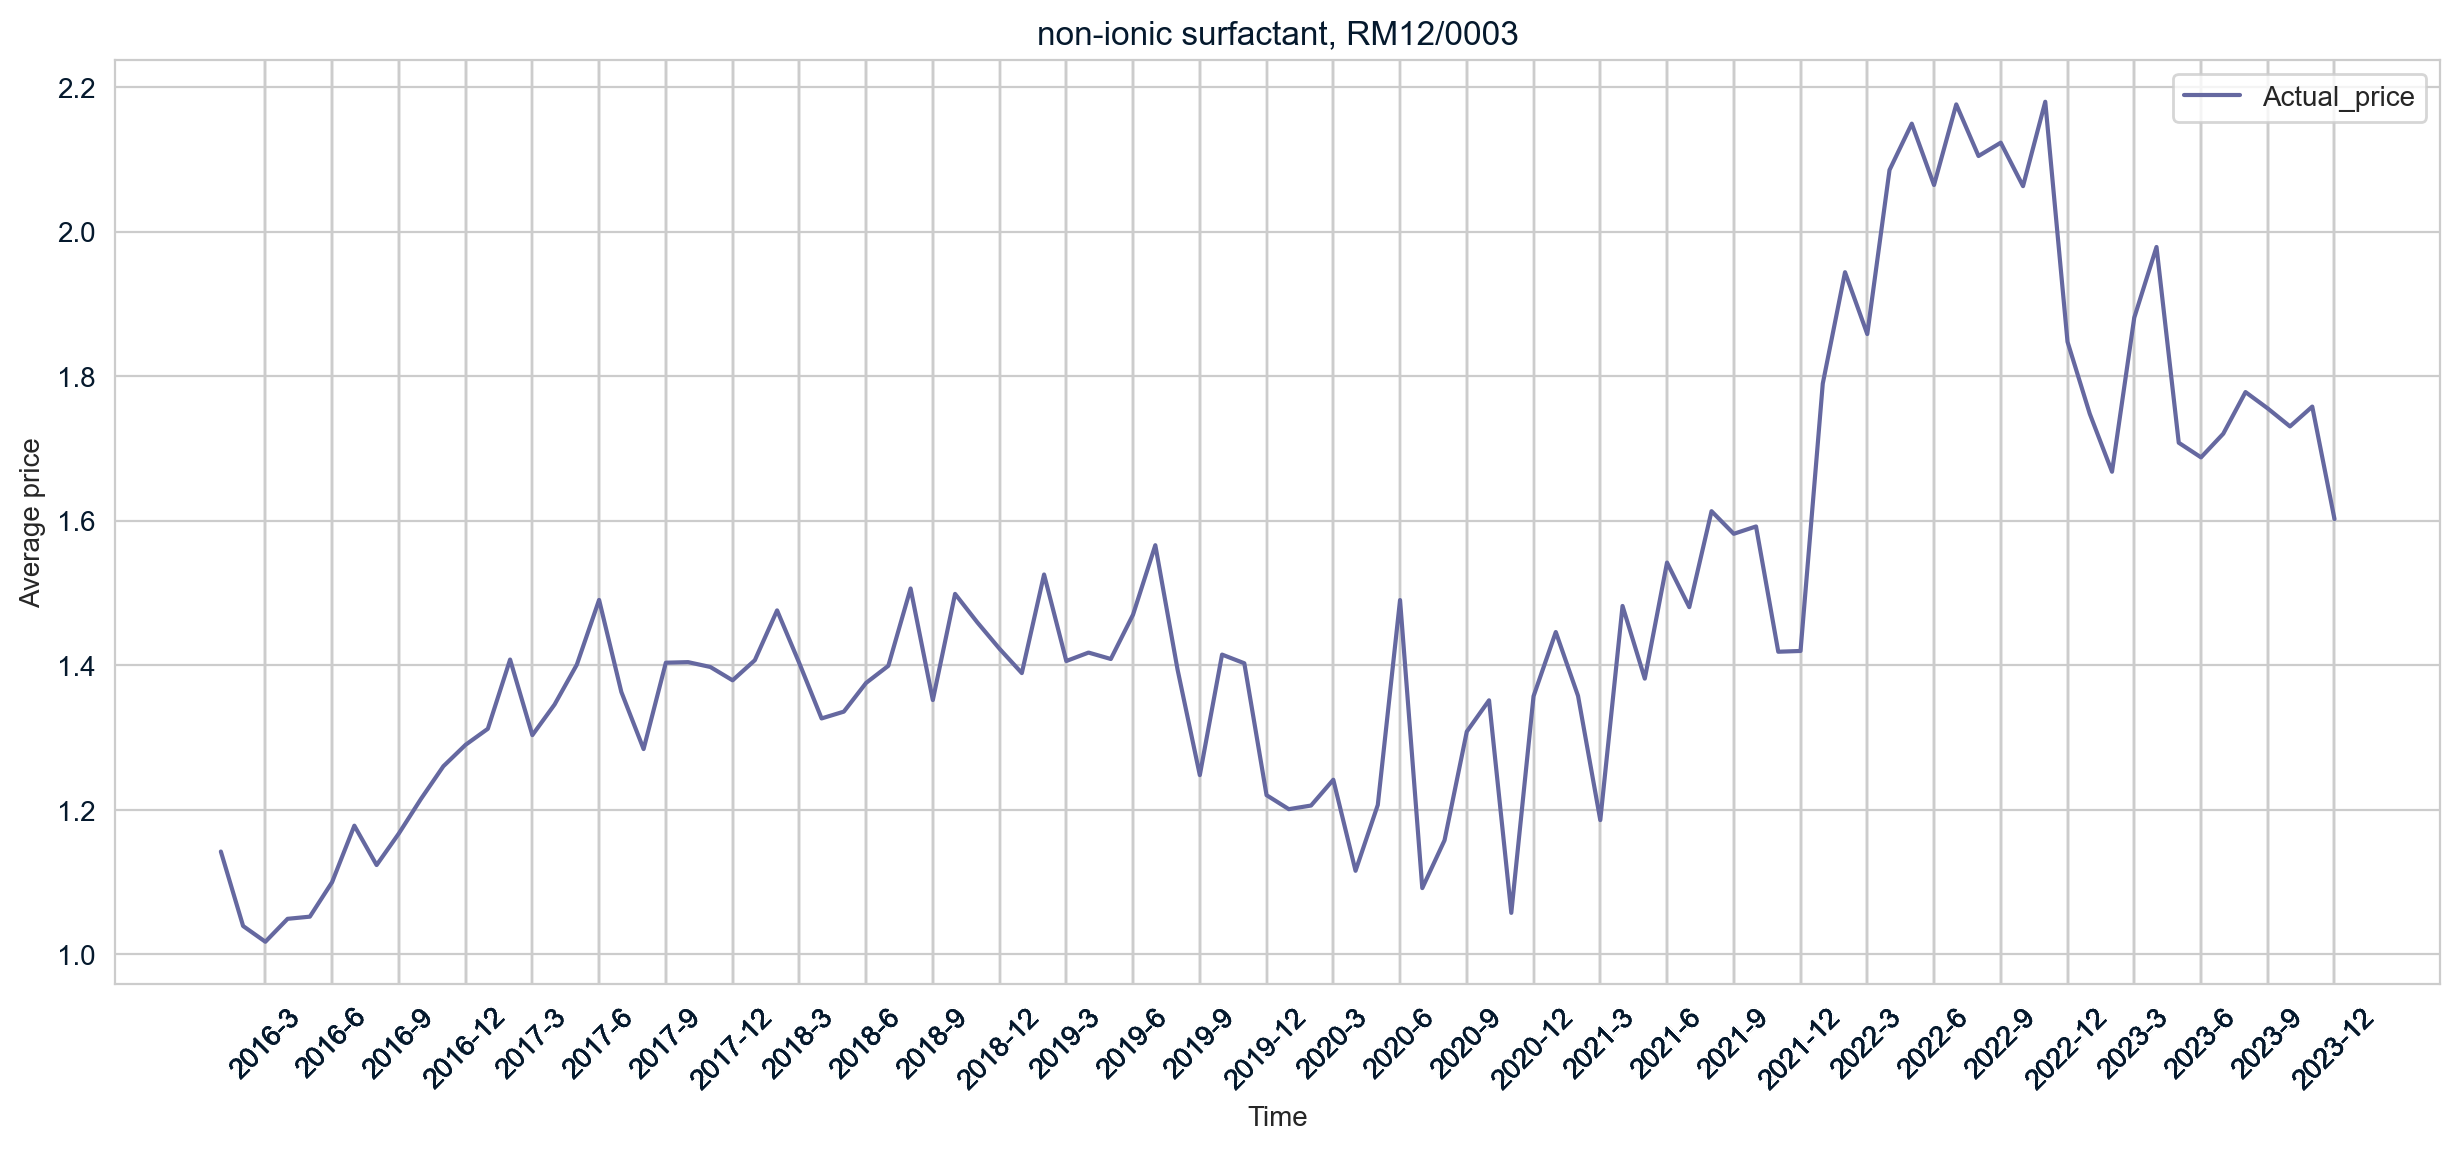

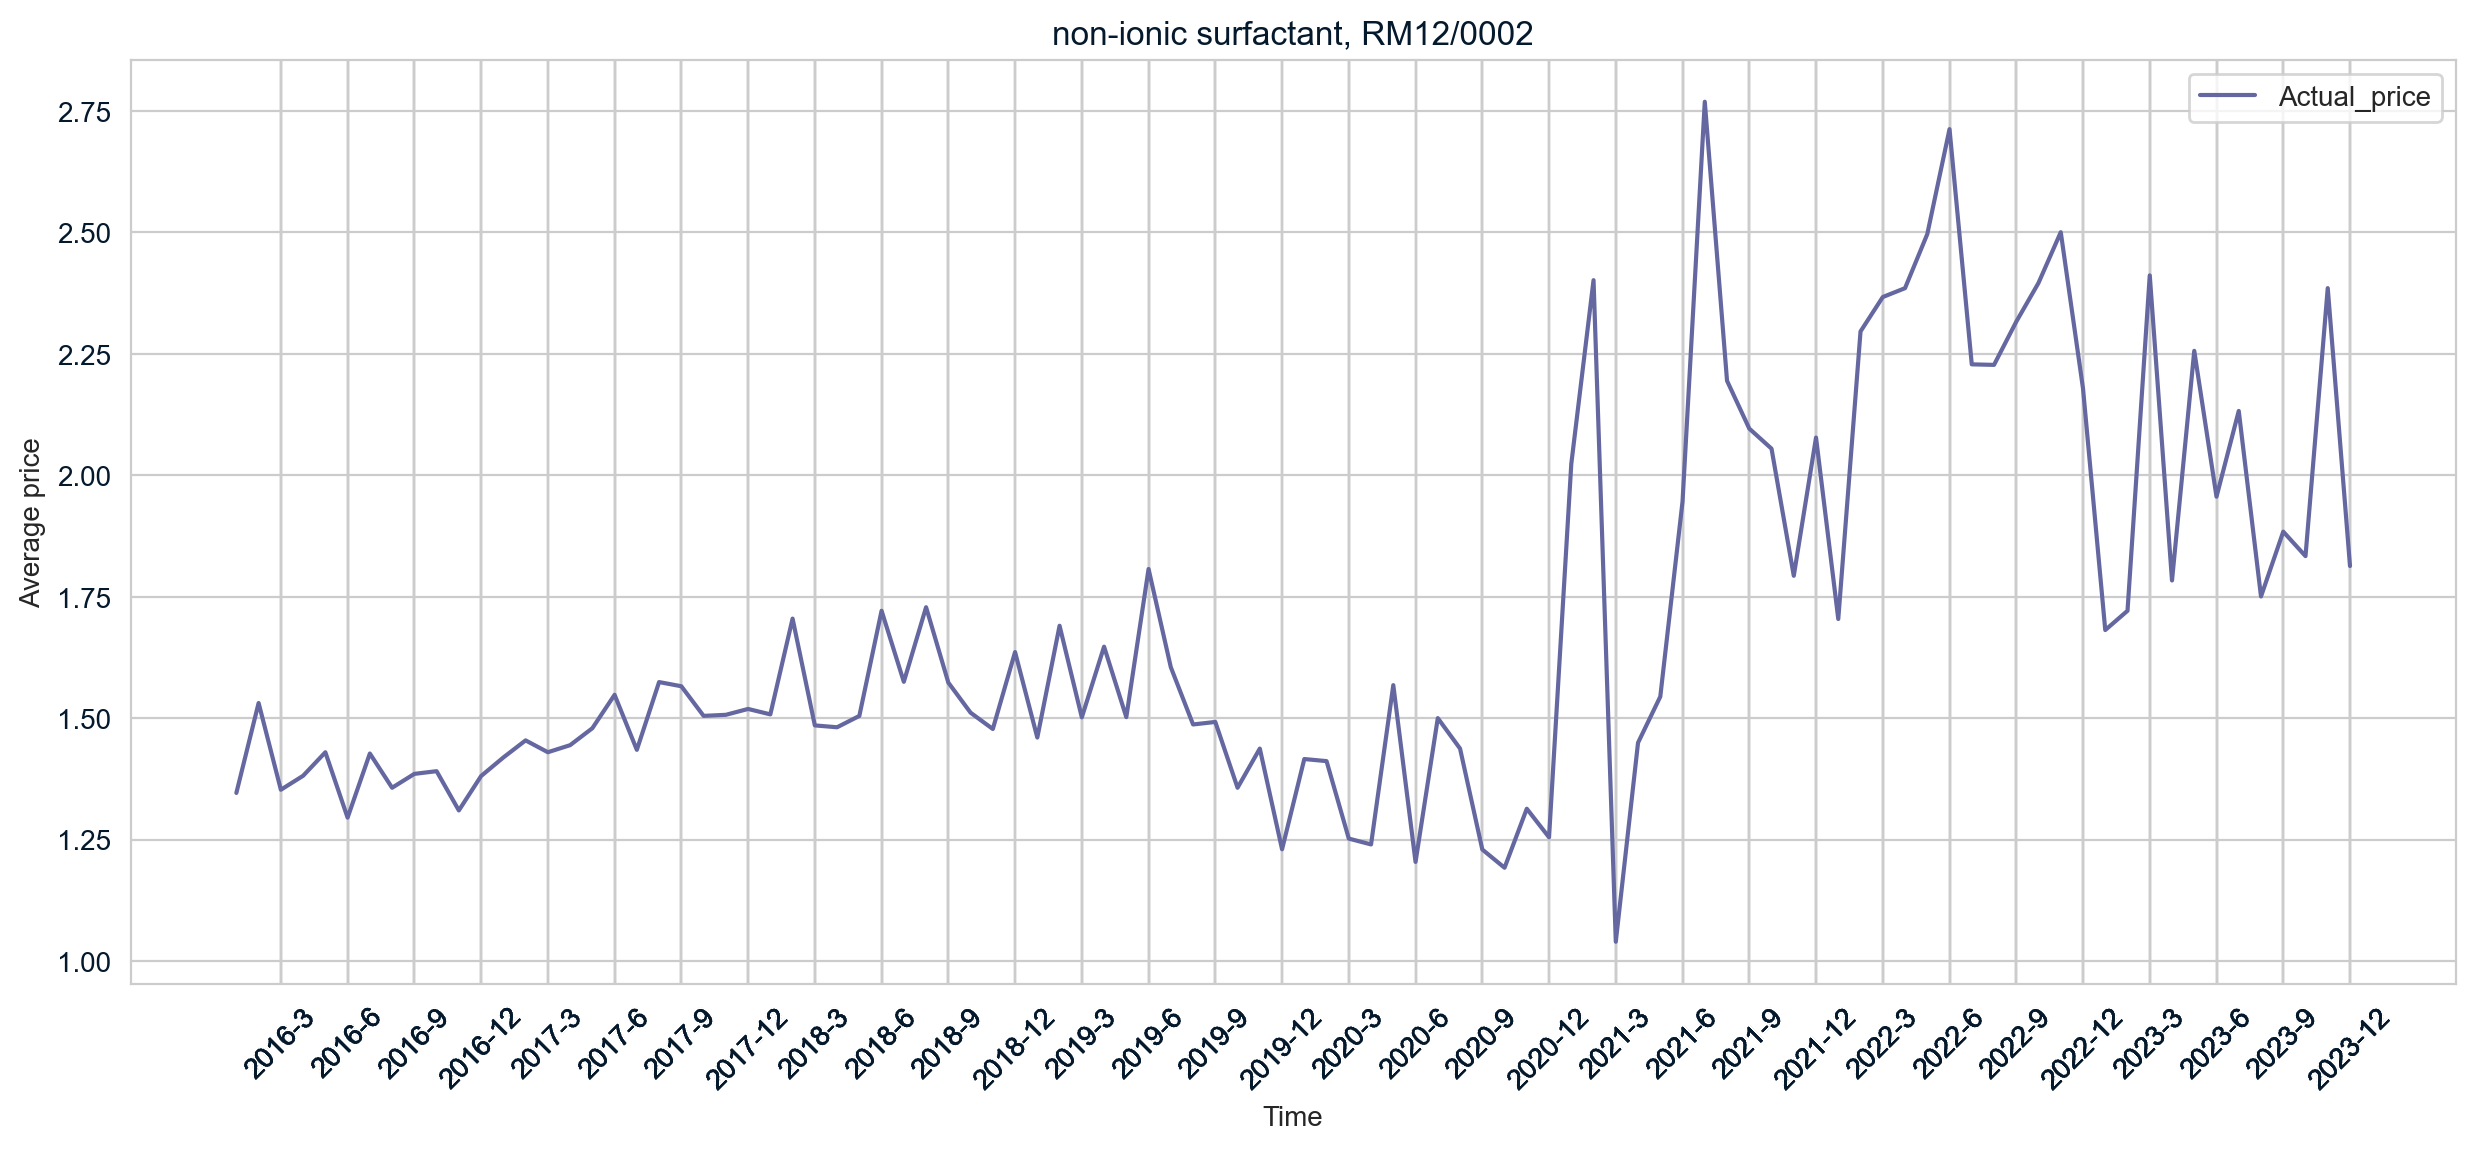

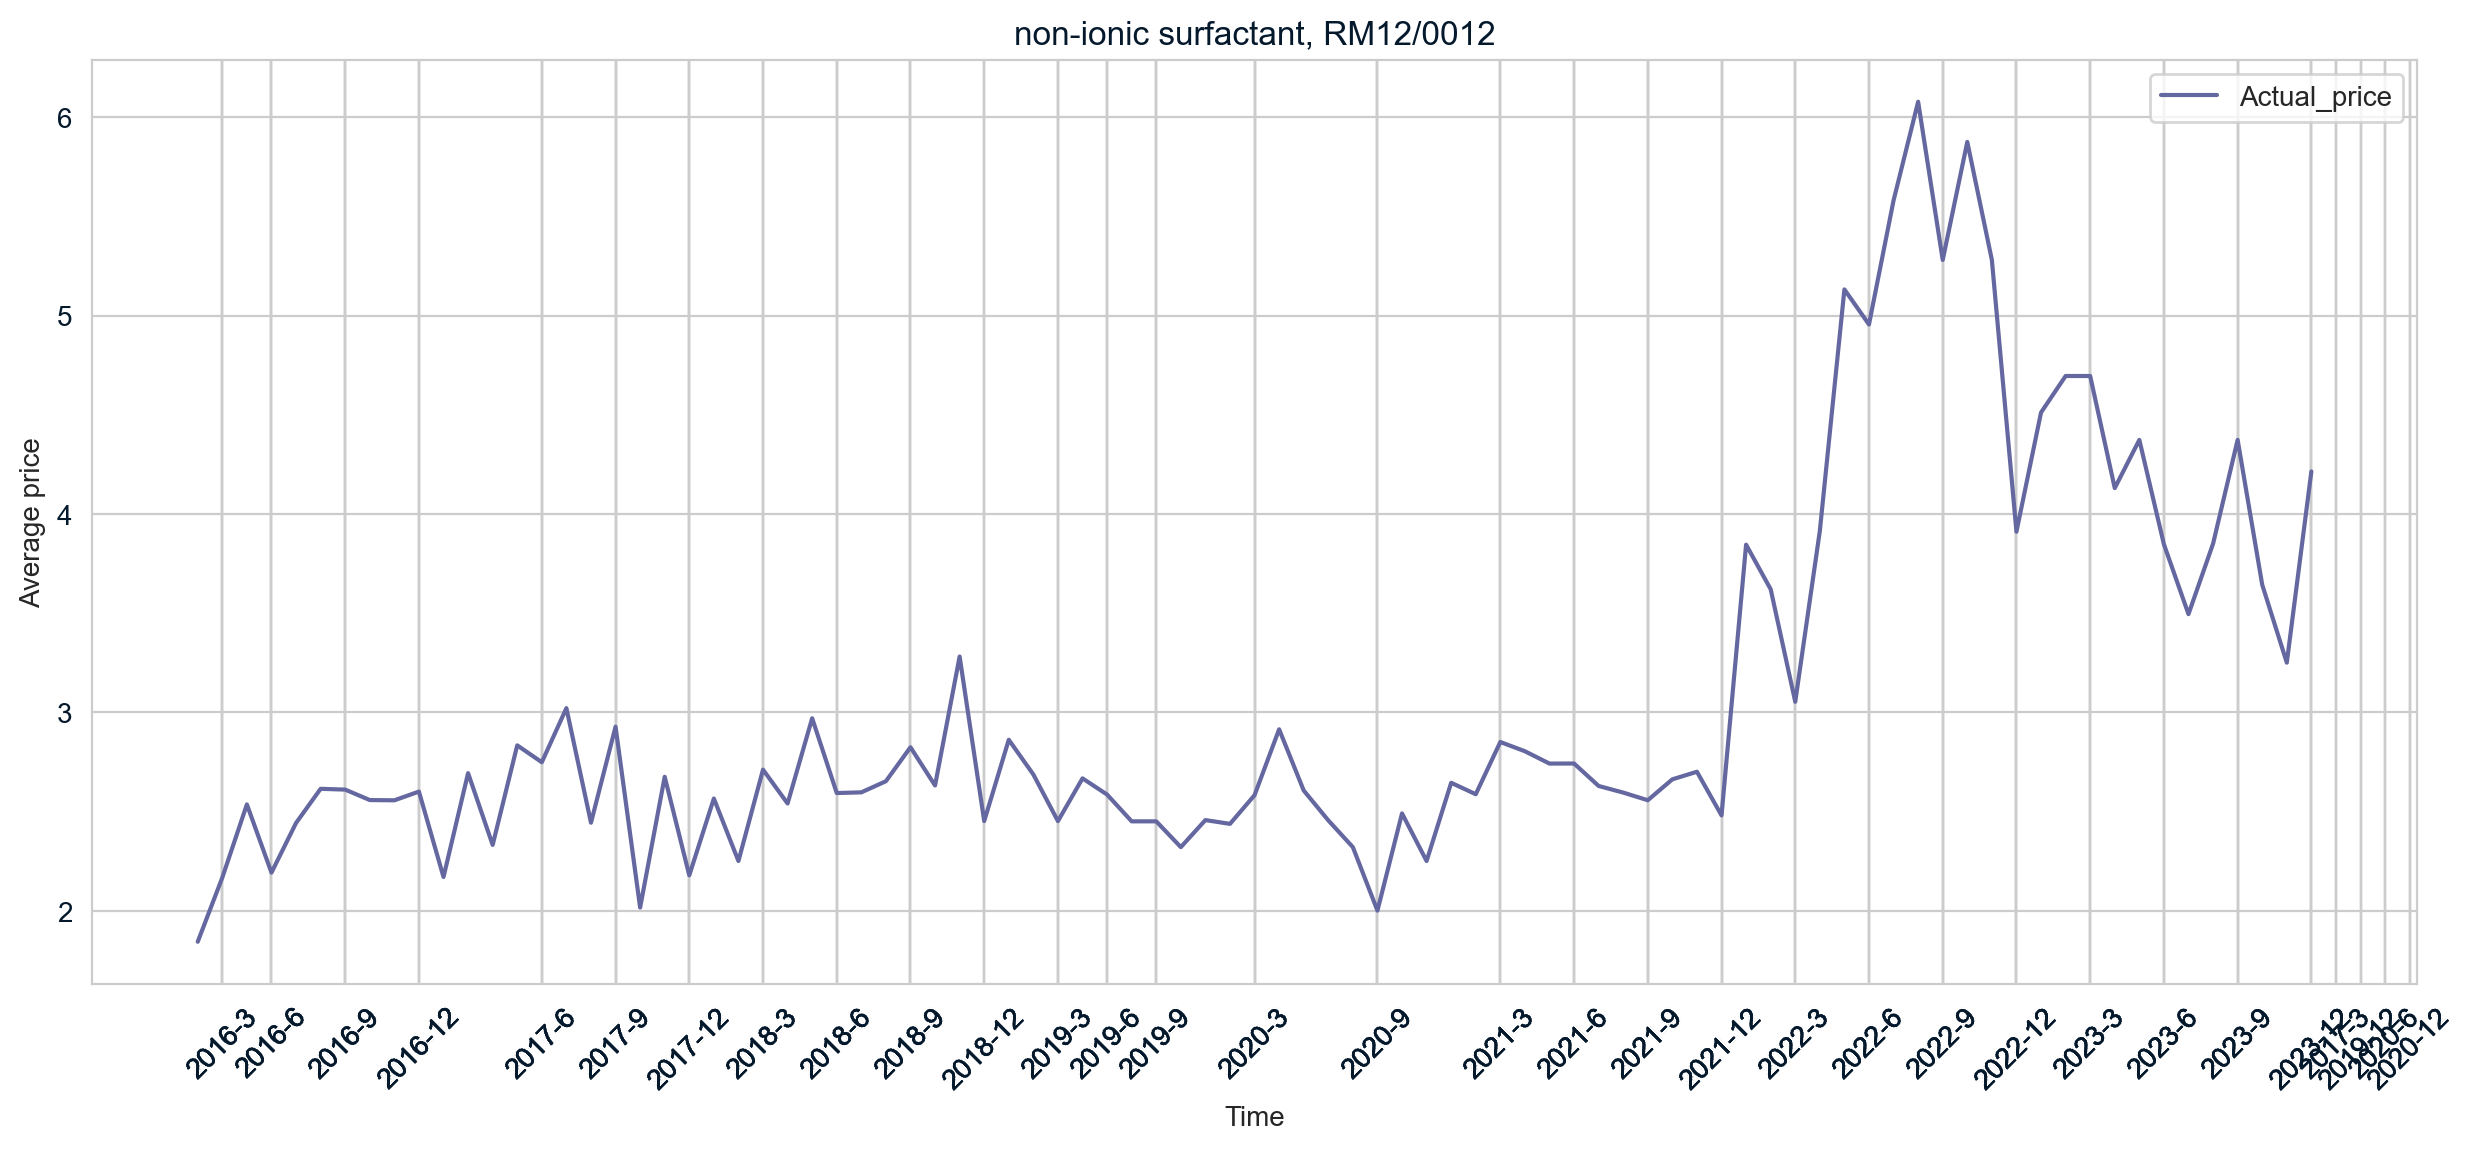

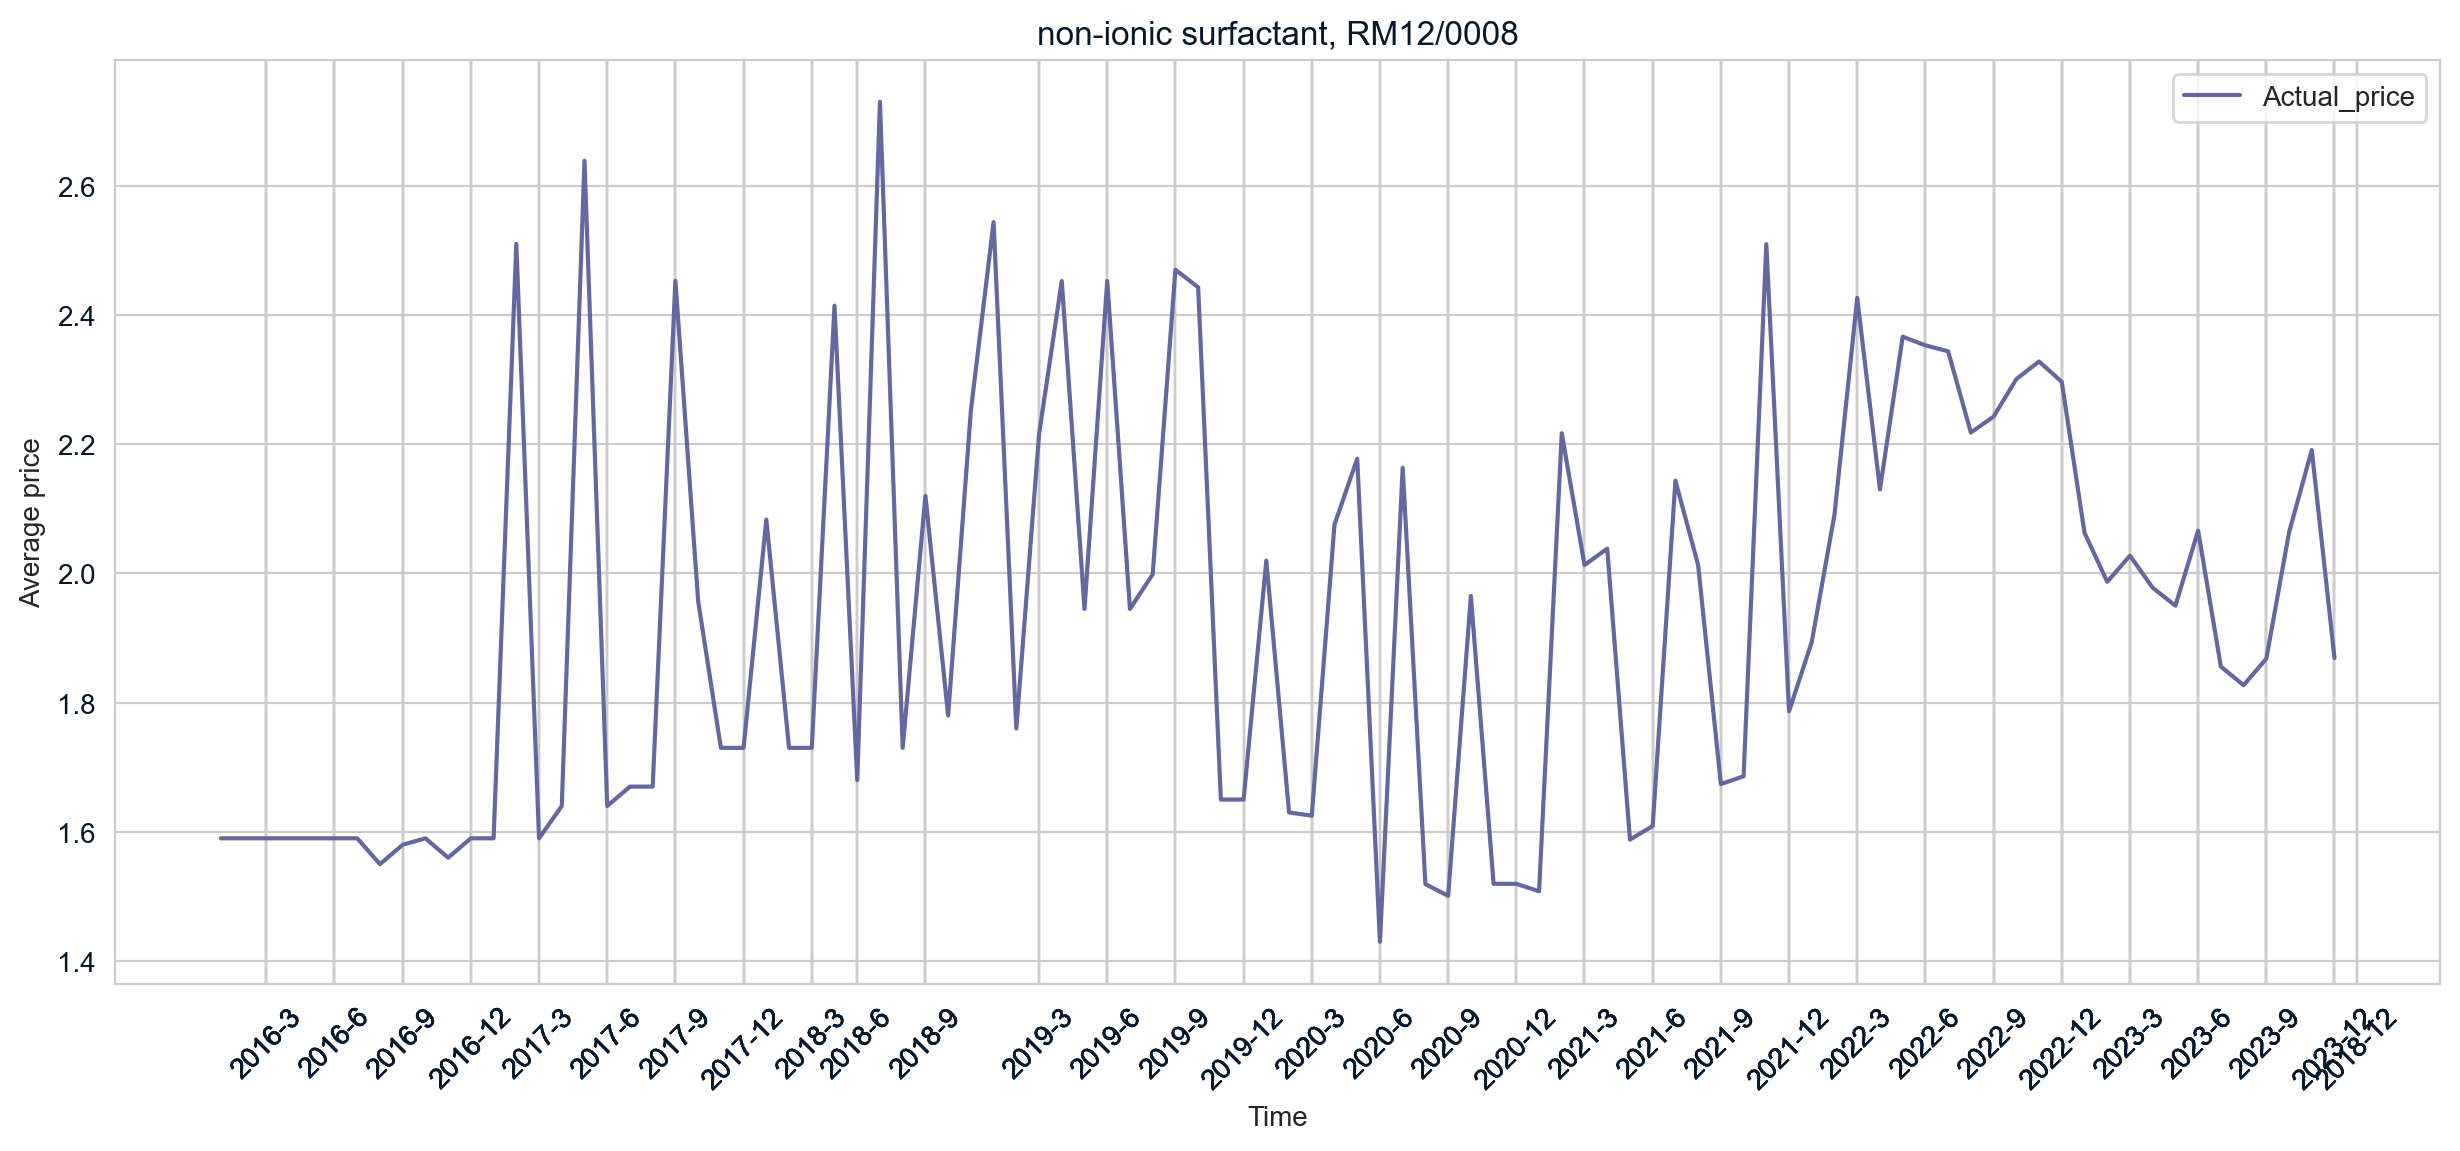

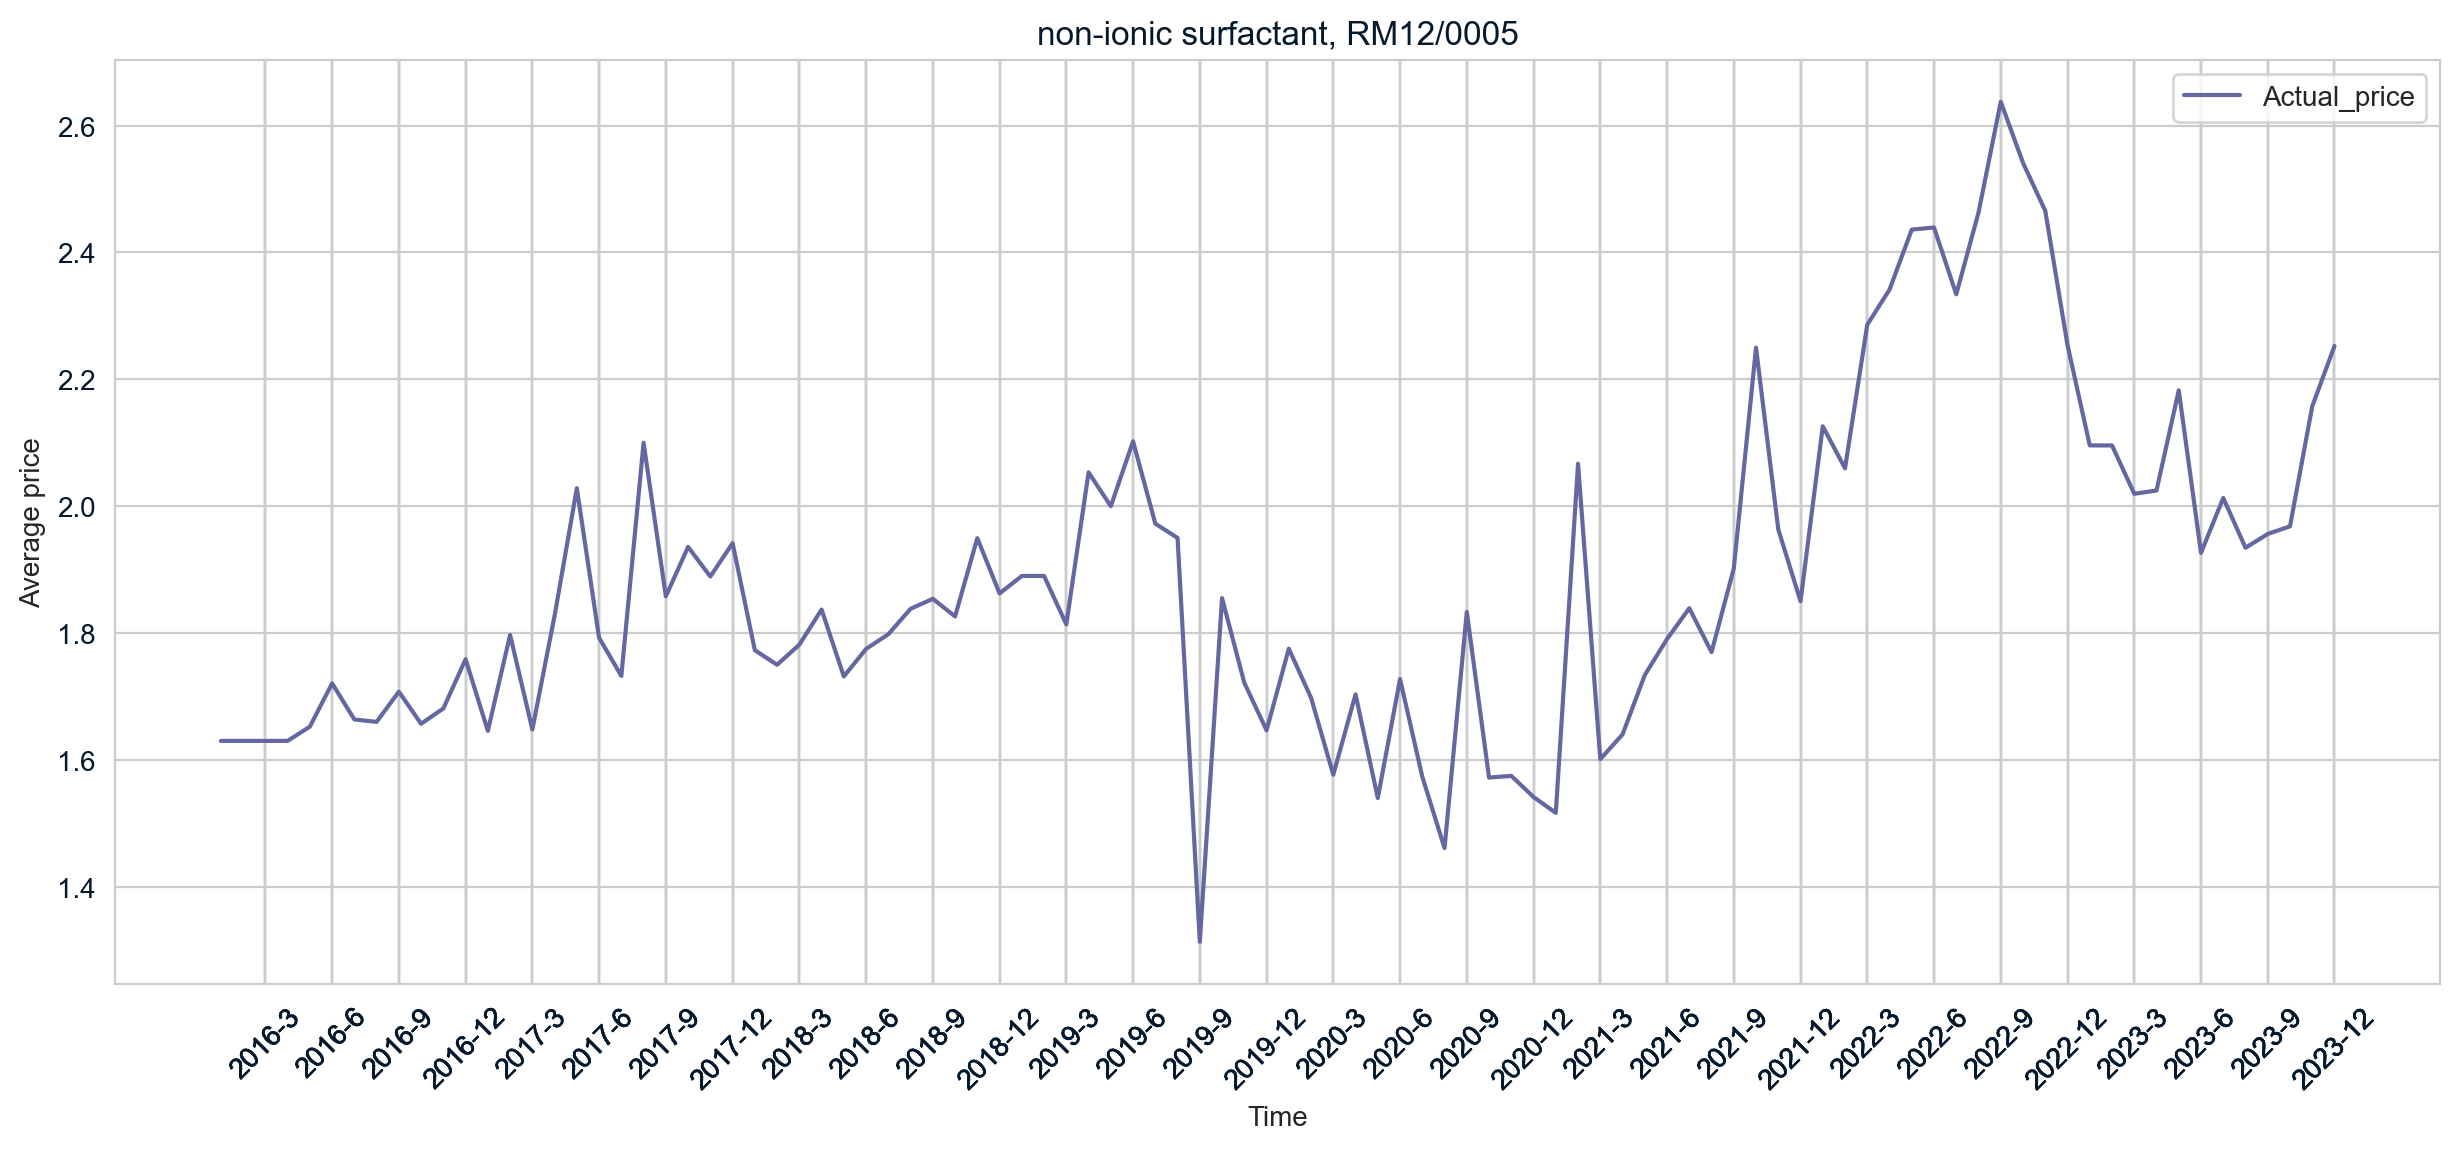

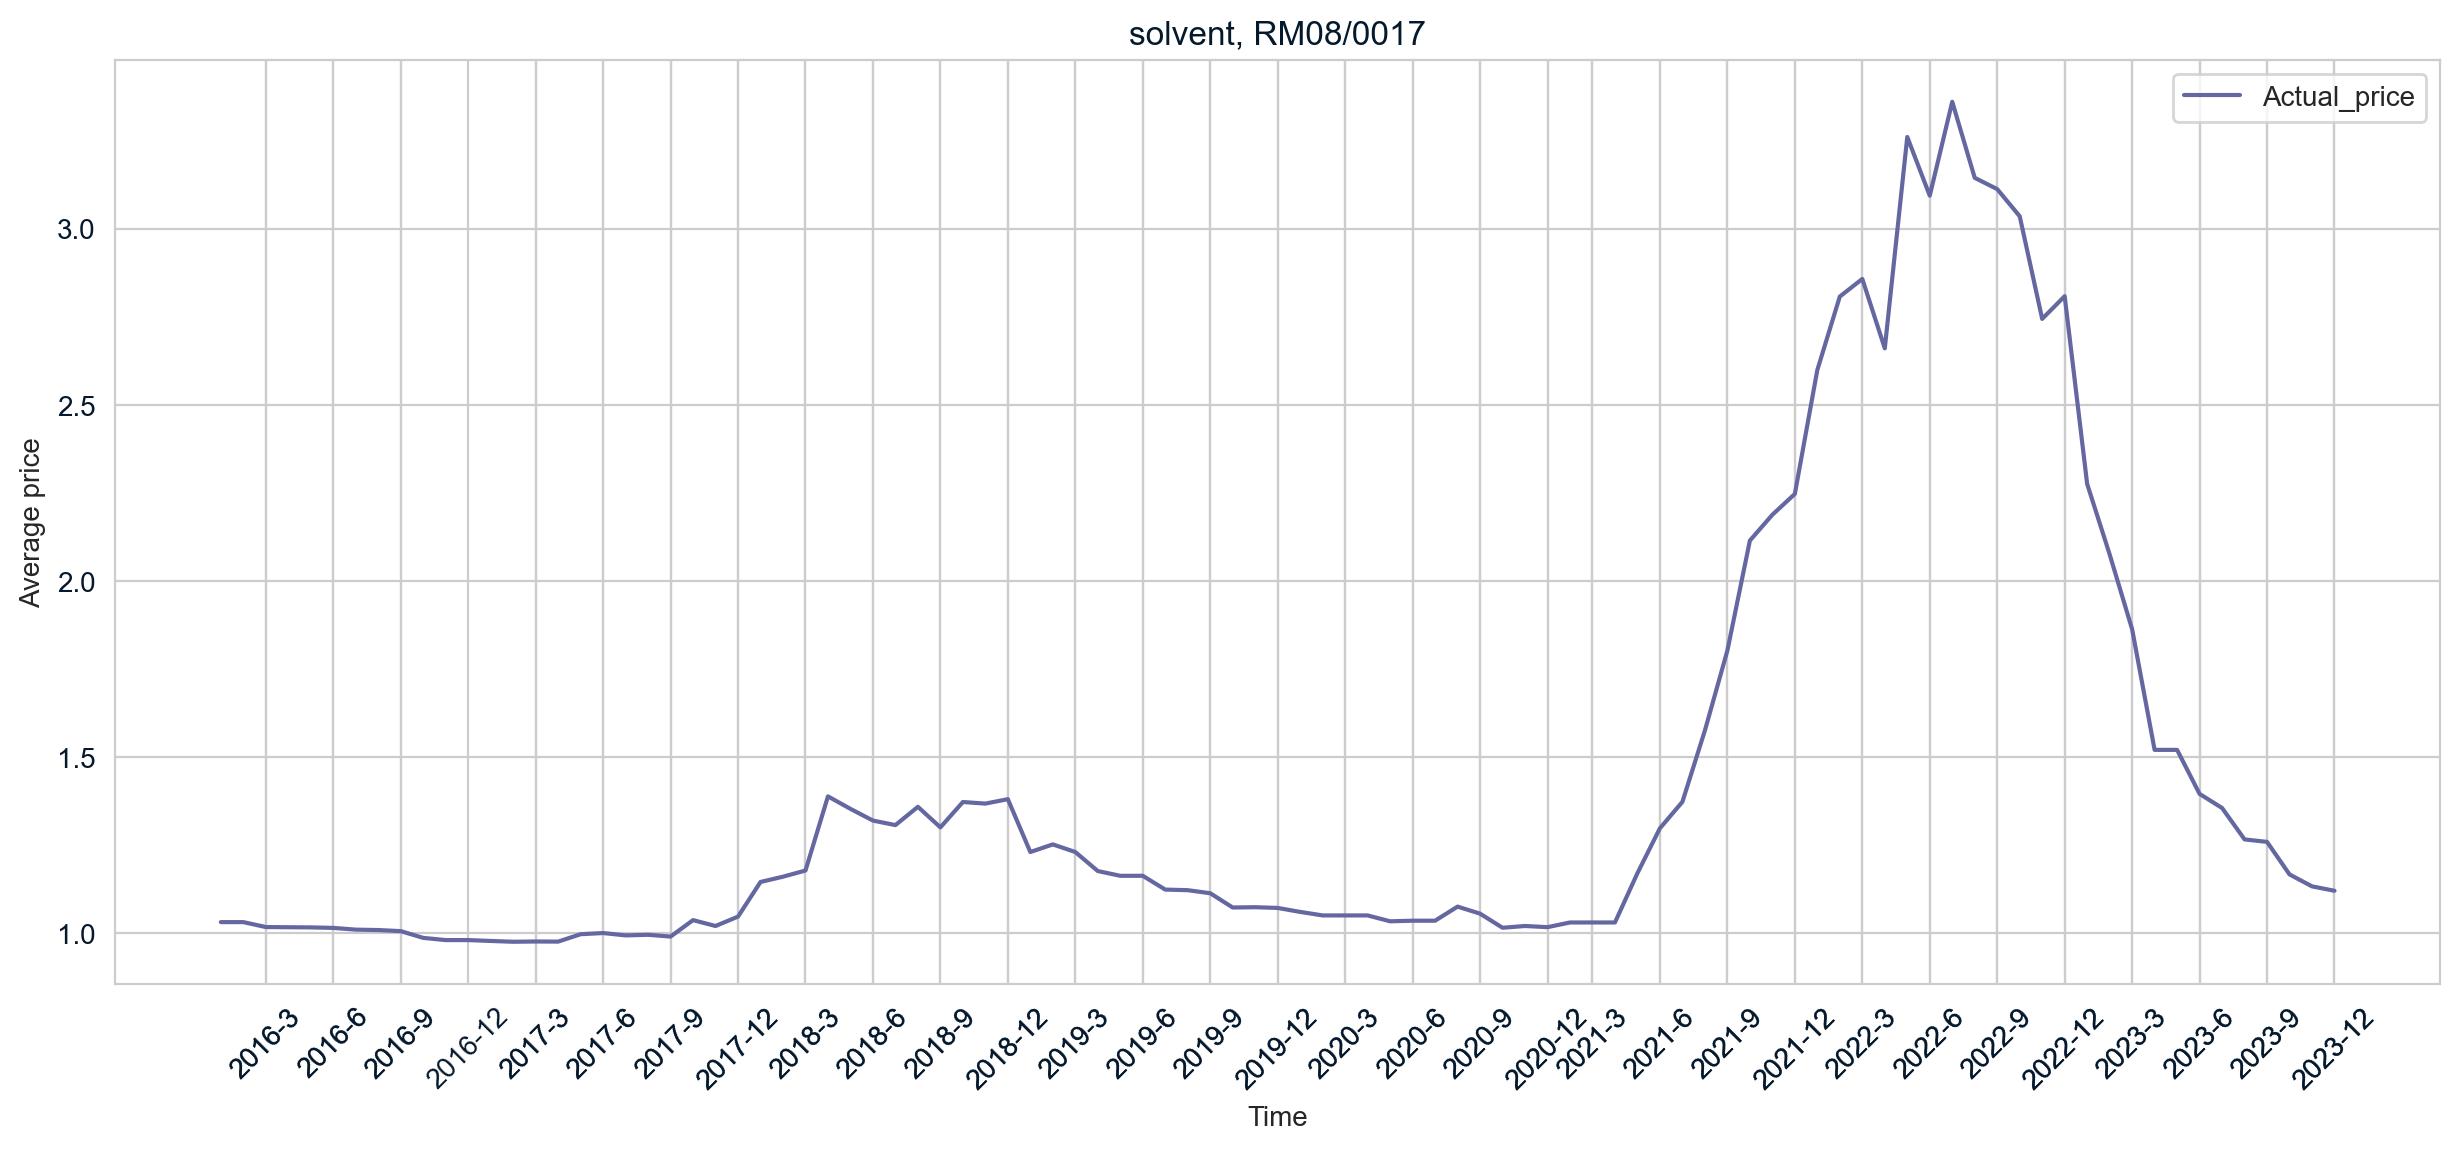

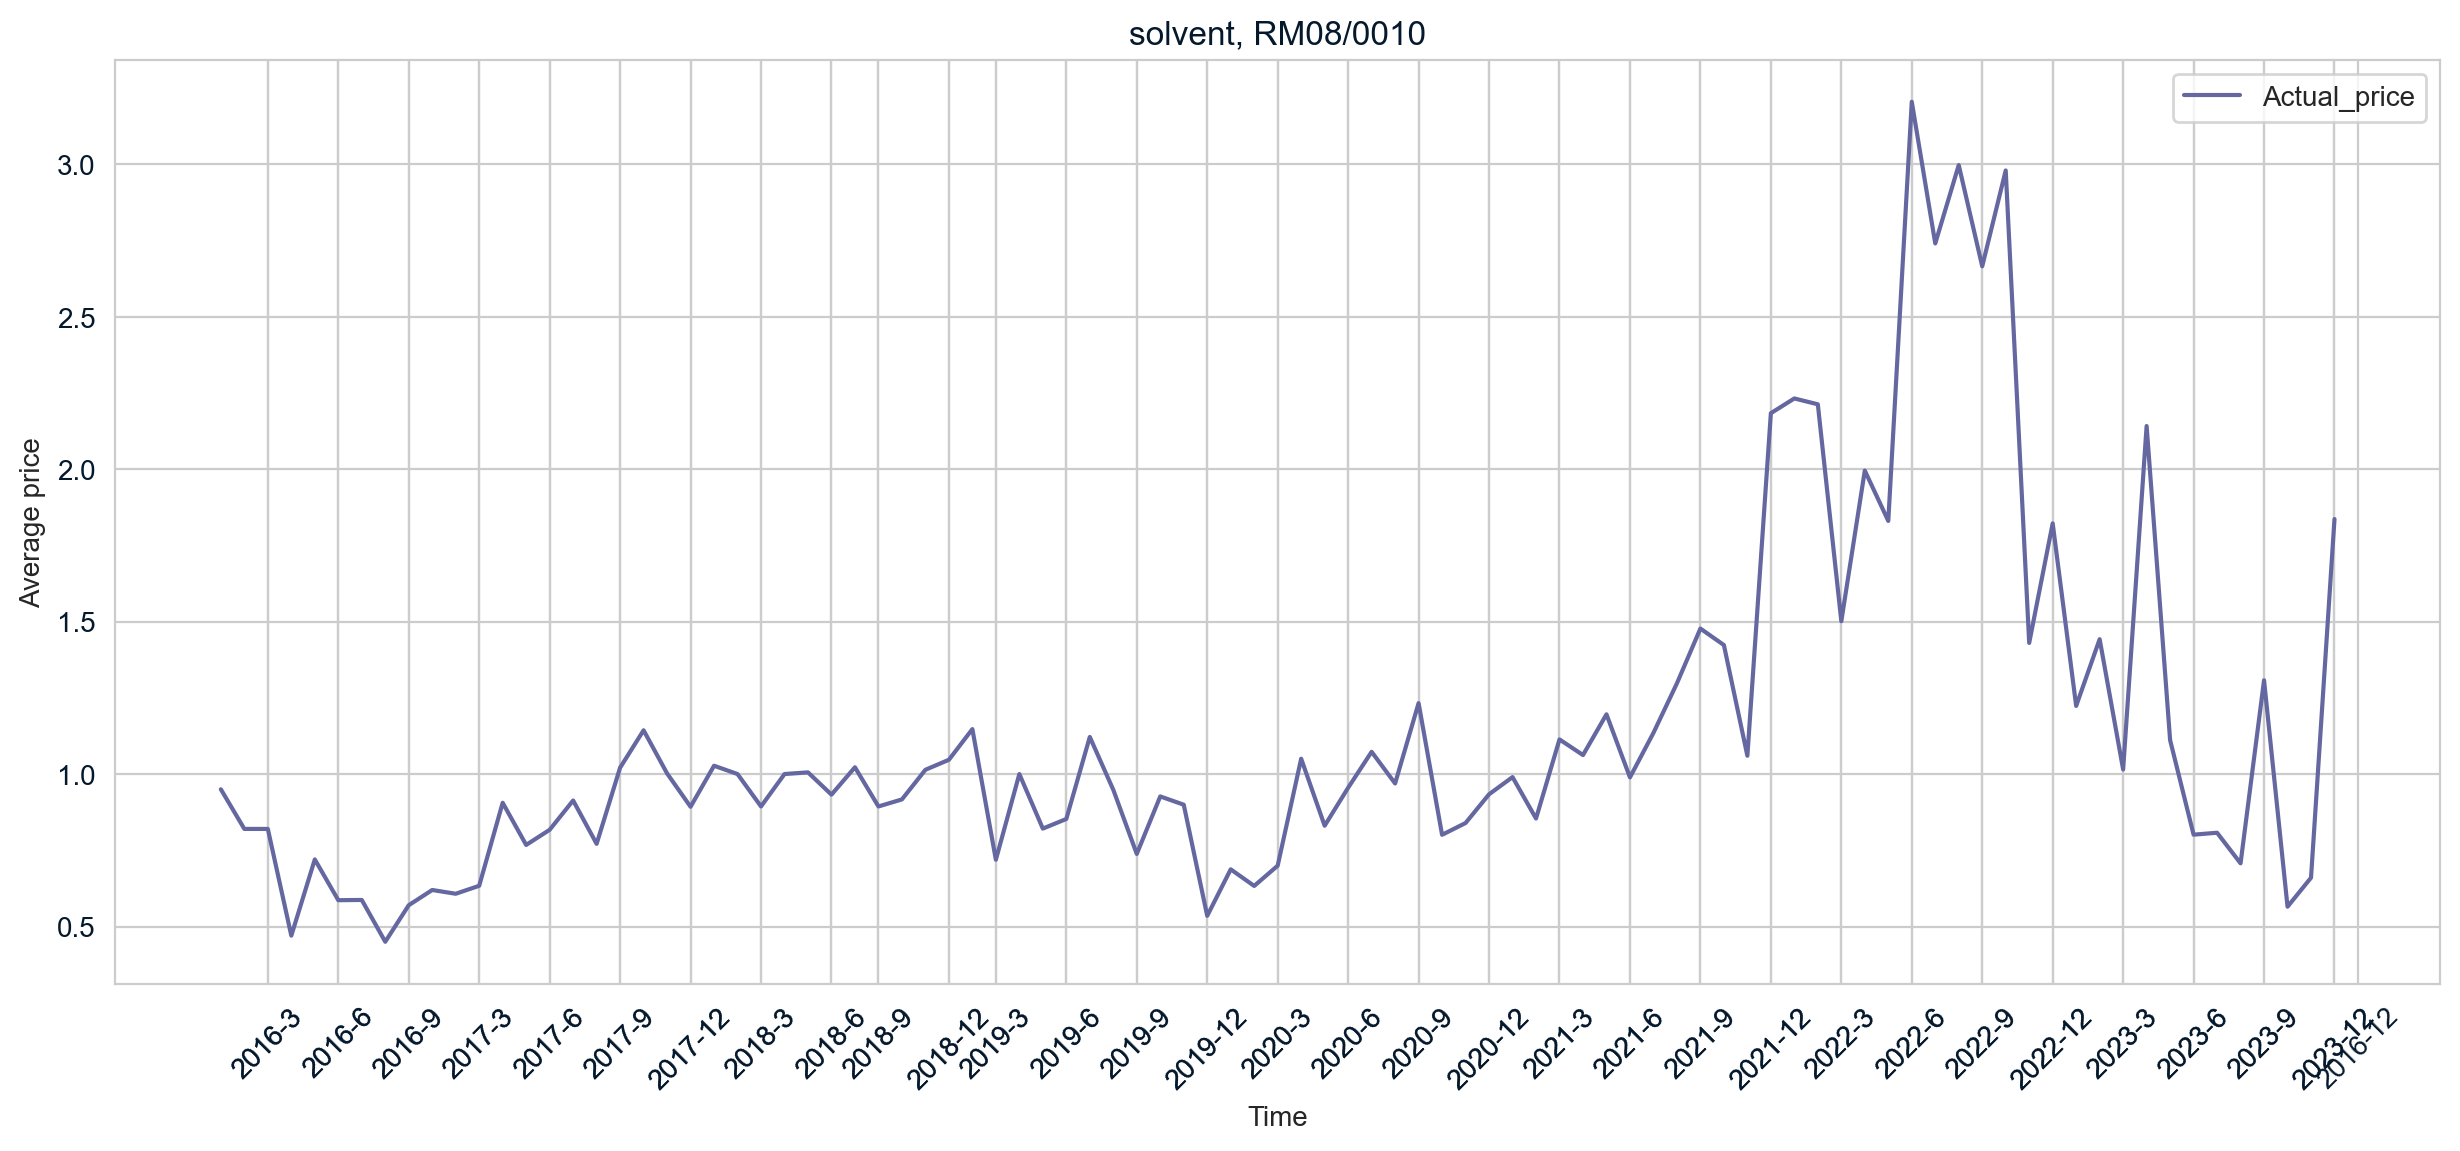

In [3]:
df = pre.clean_pred_price_evo_csv('Data_flat_files/Dataset_Future_Predicting_Price_Evolutions_202403.csv',2014,2023)

df = df[df.Year.between(2016,2023,inclusive="both")]

codes = df["Group Description"].sort_values()

target_dict = dict()
for i in range(0,8):
    target_dict[codes.unique()[i]] = df.groupby(codes)["Key RM code"].unique()[i]
    
imputed_df, missing = pre.impute_pred_price_evo_csv(df)

for target, RM_codes in target_dict.items():
    dummy_df = pre.get_dummies_and_average_price(imputed_df,target,*RM_codes)
    dummy_df['year_month'] = dummy_df['Year'].apply(round).astype('str') + "-" + dummy_df['Month'].apply(round).astype('str')
    
    draw_graph(dummy_df,'year_month','Average_price')